## Problem Statement:
- An education company named X Education sells online courses to industry professionals. The company markets its courses on their website, several websites and search engines like Google.
- When people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.
- Although X Education gets a lot of leads, its lead conversion rate is very poor around 30%. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. 
- If the company successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
- Need to find out most promising leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. 
- The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data Understanding
- Lead dataset from past has 9000 datapoints.
- Converted is the target variable and value 1 means lead was converted.
- Data dictionary has all the details of the columns.
- Many categorical variables have level 'Select' which need to be handled.

## Goals of Case Study
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads. A higher score would mean a lead is hot.
- Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?
- What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?
- For a period of 2 months in a year new interns are hired and company wants to make lead conversion aggressively during this time. What would be a good strategy to be applied at this stage?
- When company reaches its target for a quarter before deadline, they want to minimize the rate of useless calls. What would be a good strategy to be applied at this stage?

## Linear Regression Model 
Lets build a linear regression model to predict Leads using appropriate predictor variables


### Reading and Understanding the data
#### Steps:
- Importing data using the pandas library
- Understanding the structure of data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Import matplotlib and seaborn package

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import random
from scipy.stats import norm, skew

In [3]:
# Read the given CSV file, and view some sample records

leadscore = pd.read_csv("Leads.csv")
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Let's inspect the various aspects of our dataframe

In [4]:
leadscore.shape #Gives structure of dataset

(9240, 37)

In [5]:
leadscore.describe() #Gives statistical information of numeric columns

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leadscore.info() #Gives detailed information of datasets in each column alongwith non null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#checking number of null values in each columns and sorting them in descending order
leadscore.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [8]:
#checking percentage of null values in each columns and sorting them in descending order
((leadscore.isnull().sum()/len(leadscore))*100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### Data Cleaning and Preparation

In [9]:
# Lets consider allowed threshhold of upto 30% in each column for missing or null values
# Define the threshold for null value percentage
threshold = 40

# Calculate the percentage of null values for each column
percentage_null_values = (leadscore.isnull().sum() / len(leadscore)) * 100

# Find columns with null value percentage greater than the threshold
columns_to_drop = percentage_null_values[percentage_null_values > threshold].index

# Remove the columns from the DataFrame
leadscore = leadscore.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
leadscore.head()



,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [10]:
# Confirm columns are dropped
((leadscore.isnull().sum()/len(leadscore))*100).sort_values(ascending=False)

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

In [11]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Prospect ID                                         0
Digital Advertisement                               0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The

In [12]:
# Lets have a closer look at the Lead Source
leadscore['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

#### Data Quality Issues

In [13]:
# There are multiple entries in the column (Google, google), (Facebook,Social Media,youtubechannel) , (welearnblog_Home,blog)
# Lets merge the redundant values
leadscore['Lead Source'].replace('google','Google',inplace = True)
leadscore['Lead Source'].replace('youtubechannel','Social Media',inplace = True)
leadscore['Lead Source'].replace('Facebook','Social Media',inplace = True)
leadscore['Lead Source'].replace('welearnblog_Home','blog',inplace = True)

In [14]:
leadscore['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
blog                    2
WeLearn                 1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
Name: count, dtype: int64

In [15]:
# For Categorical column 'Lead Source' we can impute mode of the column to the missing / null values
leadscore['Lead Source']=leadscore['Lead Source'].fillna('Google')
leadscore['Lead Source'].value_counts()

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
blog                    2
WeLearn                 1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
Name: count, dtype: int64

In [16]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Through Recommendations                             0
Receive More Updates About Our Courses              0
Prospect ID                                         0
Newspaper                                           0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The

In [17]:
# Lets have a look at Last Activity column
leadscore['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [18]:
# Do not see any data quality issue here. Lets impute mode value for missing / null values
leadscore['Last Activity']=leadscore['Last Activity'].fillna("Email Opened")
leadscore['Last Activity'].value_counts()

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [19]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Through Recommendations                             0
Receive More Updates About Our Courses              0
Prospect ID                                         0
Newspaper                                           0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Digital Advertisement       

In [20]:
# Lets have a look at TotalVisits column
leadscore['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

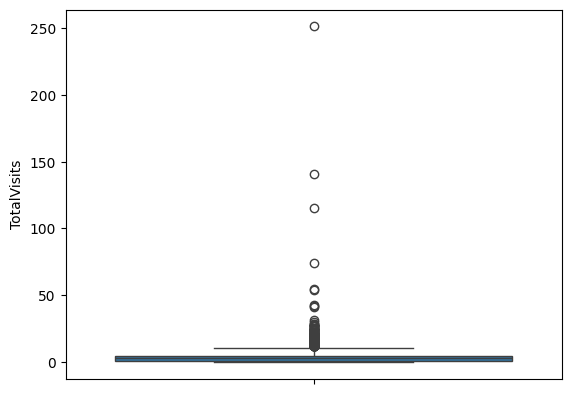

In [21]:
# TotalVisits is a numerical column, total visits count vary from 0 to ~251. Lets plot it and check for outliers
sns.boxplot(leadscore['TotalVisits'])
plt.show()

In [22]:
# Here we can impute null / missing values with median 
leadscore['TotalVisits'].fillna(leadscore['TotalVisits'].median(), inplace=True)

In [23]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
Digital Advertisement                               0
Through Recommendations                             0
Prospect ID                                         0
Receive More Updates About Our Courses              0
X Education Forums                                  0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Newspaper                   

In [24]:
# Lets have a look at TotalVisits column
leadscore['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

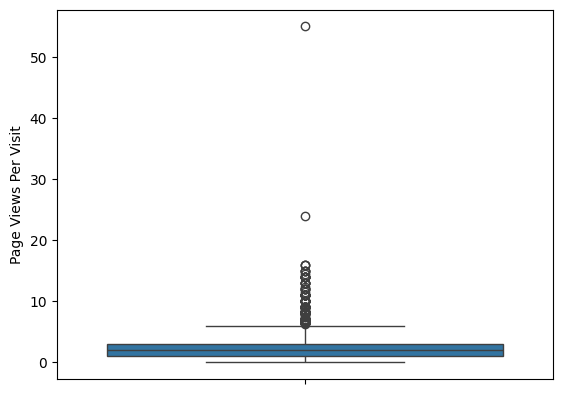

In [25]:
# Page Views Per Visit is a numerical column. Lets plot it and check for outliers
sns.boxplot(leadscore['Page Views Per Visit'])
plt.show()

In [26]:
# Here we can impute null / missing values with median 
leadscore['Page Views Per Visit'].fillna(leadscore['Page Views Per Visit'].median(), inplace=True)

In [27]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Prospect ID                                         0
Digital Advertisement                               0
Receive More Updates About Our Courses              0
Through Recommendations                             0
X Education Forums                                  0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Newspaper                                           0
Search                      

#### Here City variable is dependent on Country. So, lets take country column first for cleanup.

In [28]:
# Lets have a look at How did you hear about X Education column
leadscore['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [29]:
#imputing mode value for missing / null values
leadscore['Country']=leadscore['Country'].fillna("India")
leadscore['Country'].value_counts()

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [30]:
(leadscore['Country'].value_counts()/len(leadscore))*100

Country
India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switze

#### Here we need to checkout for levels present in Country - categorical variable. 

- We can club Asia/Pacific Region countries together whose proportion of contribution is not more than 0.25% - Singapore, Hong Kong, Bahrain, Oman, Kuwait, China, Bangladesh, Philippines, Malaysia, Sri Lanka, Indonesia, Vietnam, Austrlia
- We can club together coutries whose proportion of contribution is less than 0.01% to Other category -
unknown, South Africa, Canada, Nigeria, Germany, Sweden, Uganda, Italy, Netherlands, Belgium, Ghana, Kenya, Russia, Tanzania, Liberia, Switzerland, Denmark

In [31]:
# Define a list of countries to be merged into 'Other'
countries_to_merge = ['Singapore','Hong Kong','Bahrain','Oman','Kuwait','China','Bangladesh','Philippines','Malaysia',
                      'Sri Lanka','Indonesia','Vietnam','Austrlia']

# Replace the specified countries with 'Asia/Pacific Region'
leadscore['Country'].replace(countries_to_merge, 'Asia/Pacific Region', inplace=True)

In [32]:
leadscore['Country'].value_counts()

Country
India                   8953
United States             69
Asia/Pacific Region       60
United Arab Emirates      53
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
France                     6
unknown                    5
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Uganda                     2
Italy                      2
Netherlands                2
Belgium                    2
Ghana                      2
Kenya                      1
Russia                     1
Tanzania                   1
Liberia                    1
Switzerland                1
Denmark                    1
Name: count, dtype: int64

In [33]:
# Define a list of countries to be merged into 'Other'
countries_to_merge = ['unknown', 'South Africa', 'Canada', 'Nigeria', 'Germany', 'Sweden', 'Uganda', 'Italy', 'Netherlands', 'Belgium', 
                      'Ghana', 'Kenya', 'Russia', 'Tanzania', 'Liberia', 'Switzerland', 'Denmark']

# Replace the specified countries with 'Other'
leadscore['Country'].replace(countries_to_merge, 'Other', inplace=True)

In [34]:
leadscore['Country'].value_counts()

Country
India                   8953
United States             69
Asia/Pacific Region       60
United Arab Emirates      53
Other                     40
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
France                     6
Name: count, dtype: int64

In [35]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Prospect ID                                         0
Digital Advertisement                               0
Newspaper                                           0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Newspaper Article                                   0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
X Education Forums                                  0
Search                      

In [36]:
# Lets have a look at City column
leadscore['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [37]:
# Here we can see that Select has 2249 count which is same as null and already 1420 value are missing.
# Sum comes out to be 3669 which is more than the 30% accepted threshold. Lets not drop city column but try to clean it further to understand 
# leads from the cities. Lets assign Unknown value to missing/null values.

leadscore['City']=leadscore['City'].replace("Select","Unknown")
leadscore['City']=leadscore['City'].fillna("Unknown")

In [38]:
# Lets have a look at City column
leadscore['City'].value_counts()

City
Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [39]:
# Dataset has multiple countries but only indian cities  are visible. Lets have a look at leadscore city column having country other than india
leadscore[leadscore['Country']!='India']['City']

14           Unknown
87            Mumbai
103           Mumbai
207          Unknown
243           Mumbai
            ...     
9139          Mumbai
9173         Unknown
9225          Mumbai
9235          Mumbai
9239    Other Cities
Name: City, Length: 287, dtype: object

In [40]:
# Lets replace these with "Other International City" value
leadscore.loc[leadscore['Country']!='India','City']="Other International City"
leadscore[leadscore['Country']!='India']['City']

14      Other International City
87      Other International City
103     Other International City
207     Other International City
243     Other International City
                  ...           
9139    Other International City
9173    Other International City
9225    Other International City
9235    Other International City
9239    Other International City
Name: City, Length: 287, dtype: object

In [41]:
# Lets have a look at City column
leadscore['City'].value_counts()

City
Unknown                        3609
Mumbai                         3129
Thane & Outskirts               731
Other Cities                    619
Other Cities of Maharashtra     434
Other Metro Cities              360
Other International City        287
Tier II Cities                   71
Name: count, dtype: int64

In [42]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
Prospect ID                                         0
Through Recommendations                             0
Newspaper                                           0
Digital Advertisement                               0
Receive More Updates About Our Courses              0
Newspaper Article                                   0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
City                                                0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
X Education Forums                                  0
Search                      

In [43]:
# Lets have a look at Specialization column
leadscore['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [44]:
# Here we can see that Select has 1942 count which is same as null and already 1438 value are missing.
# Sum comes out to be 3380 which is more than the 30% accepted threshold. Lets not drop Specialization column but try to clean 
# it further to understand leads from different Specializations. Lets assign Unknown value to missing/null values.
leadscore.Specialization.replace("Select","Unknown",inplace=True)
leadscore.Specialization.value_counts()

Specialization
Unknown                              1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [45]:
leadscore.Specialization=leadscore.Specialization.fillna("Unknown")
leadscore.Specialization.value_counts()

Specialization
Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [46]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Receive More Updates About Our Courses              0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Prospect ID                                         0
Newspaper Article                                   0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
City                                                0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
X Education Forums                                  0
Search                                              0
Magazine                    

In [47]:
# Lets have a look at How did you hear about X Education column
leadscore['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [48]:
# Here we can see that Select has 5043 count which is same as null and already 2207 value are missing.
# Sum comes out to be 7250 which is more than the 30% accepted threshold ~78%. We can drop How did you hear about X Education column
leadscore = leadscore.drop('How did you hear about X Education', axis=1, errors='ignore')

In [49]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Prospect ID                                         0
Newspaper Article                                   0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
City                                                0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Search                                              0
Magazine                                            0
Lead Number                 

In [50]:
# Lets have a closure look at What is your current occupation column
leadscore['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [51]:
# Imputing missing/null values with mode

leadscore['What is your current occupation']=leadscore['What is your current occupation'].fillna('Unemployed')
leadscore['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [52]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
Prospect ID                                         0
Magazine                                            0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
City                                                0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Search                                              0
Lead Number                                         0
What is your current occupat

In [53]:
# Lets have a close look at What is your current occupation column
leadscore['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [54]:
# Imputing missing/null values with mode

leadscore['What matters most to you in choosing a course']=leadscore['What matters most to you in choosing a course'].fillna('Better Career Prospects')
leadscore['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [55]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Tags                                             3353
Lead Profile                                     2709
Prospect ID                                         0
Magazine                                            0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
City                                                0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Search                                              0
Lead Number                                         0
What matters most to you in choosing a course       0
What is your current occupat

In [56]:
# Lets have a close look at Lead Profile column
leadscore['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

#### Lead Profile has 4146 Select count and 2709 missing / null value count. Total of 6855 - proportion of missing/null values ~75%. We will drop this column

In [57]:
leadscore = leadscore.drop('Lead Profile', axis=1, errors='ignore')

In [58]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Tags                                             3353
Prospect ID                                         0
Lead Number                                         0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
City                                                0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
What matters most to you in choosing a course       0
What is your current occupation                     0
Specialization              

In [59]:
# Lets have a close look at tags column
leadscore['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

#### Tags have 3353 missing / null value count. Proportion of missing/null values ~36%. Lets keep this column and assign it to unknown.

In [60]:
leadscore['Tags']=leadscore['Tags'].fillna("Unknown")

In [61]:
# Lets have a close look at tags column
leadscore['Tags'].value_counts()

Tags
Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [62]:
# Lets get the count of remaining leadscore dataframe columns having missing / null values
leadscore.isnull().sum().sort_values(ascending=False)

Prospect ID                                      0
Lead Number                                      0
A free copy of Mastering The Interview           0
I agree to pay the amount through cheque         0
City                                             0
Get updates on DM Content                        0
Update me on Supply Chain Content                0
Tags                                             0
Receive More Updates About Our Courses           0
Through Recommendations                          0
Digital Advertisement                            0
Newspaper                                        0
X Education Forums                               0
Newspaper Article                                0
Magazine                                         0
Search                                           0
What matters most to you in choosing a course    0
What is your current occupation                  0
Specialization                                   0
Country                        

### Data Cleaning is Complete !!

In [63]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

#### Lets have a closer look at the categorical columns. While cleaning data we could see some values were very dominant in each categorical column.
#### Lets find out dominance of most frequent value in each column. 


In [64]:
# Select only categorical (non numeric) columns
categorical_columns = leadscore.select_dtypes(include=['object']).columns 

# Loop iterates over each column in categorical_columns. 
# leadscore[x].value_counts(): Calculates the frequency of each unique value in the current column x and returns a Series where the index is the unique values and the values are their respective counts.
# list(leadscore[x].value_counts())[0]: This extracts the count of the most frequent value (mode) in the current column x
# sum(leadscore[x].value_counts()): This calculates the total count of all values in the current column x by summing up all the counts returned by value_counts()

for x in leadscore[categorical_columns]:
    print(x,": ",round(int(list(leadscore[x].value_counts())[0])/int(sum(leadscore[x].value_counts()))*100,2),"%")

# This code provides insights into the dominance of the most frequent value in each categorical column by showing what percentage of the column consists of that value.

Prospect ID :  0.01 %
Lead Origin :  52.88 %
Lead Source :  31.48 %
Do Not Email :  92.06 %
Do Not Call :  99.98 %
Last Activity :  38.31 %
Country :  96.89 %
Specialization :  36.58 %
What is your current occupation :  89.72 %
What matters most to you in choosing a course :  99.97 %
Search :  99.85 %
Magazine :  100.0 %
Newspaper Article :  99.98 %
X Education Forums :  99.99 %
Newspaper :  99.99 %
Digital Advertisement :  99.96 %
Through Recommendations :  99.92 %
Receive More Updates About Our Courses :  100.0 %
Tags :  36.29 %
Update me on Supply Chain Content :  100.0 %
Get updates on DM Content :  100.0 %
City :  39.06 %
I agree to pay the amount through cheque :  100.0 %
A free copy of Mastering The Interview :  68.74 %
Last Notable Activity :  36.87 %


#### Lets choose 80% as the threshold - any value appearing more than 80% times in a column can be dropped. As these columns won't contribute much.

In [65]:
# Lets removes categorical columns from the DataFrame leadscore where the most frequent value accounts for more than 80% of the data
for x in leadscore[categorical_columns]:
    if (int(list(leadscore[x].value_counts())[0])/int(sum(leadscore[x].value_counts())))*100>80:
        del leadscore[x]

In [66]:
# Lets print the percentage of occurrences of the most frequent value in each column of the DataFrame leadscore, rounded to 2 decimal places.

for x in leadscore.columns:
    print(x,": ",round(int(list(leadscore[x].value_counts())[0])/int(sum(leadscore[x].value_counts()))*100,2),"%")

Prospect ID :  0.01 %
Lead Number :  0.01 %
Lead Origin :  52.88 %
Lead Source :  31.48 %
Converted :  61.46 %
TotalVisits :  23.69 %
Total Time Spent on Website :  23.73 %
Page Views Per Visit :  23.69 %
Last Activity :  38.31 %
Specialization :  36.58 %
Tags :  36.29 %
City :  39.06 %
A free copy of Mastering The Interview :  68.74 %
Last Notable Activity :  36.87 %


In [67]:
# Lets have a look at the column information

leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  Tags                                    9240 non-null   obje

### Visualizing the data
Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to Converted leads

In [68]:
# Lets drop "Lead Number" from existing leadscore dataframe
leadscore01 = leadscore.drop('Lead Number',axis=1,inplace=False)

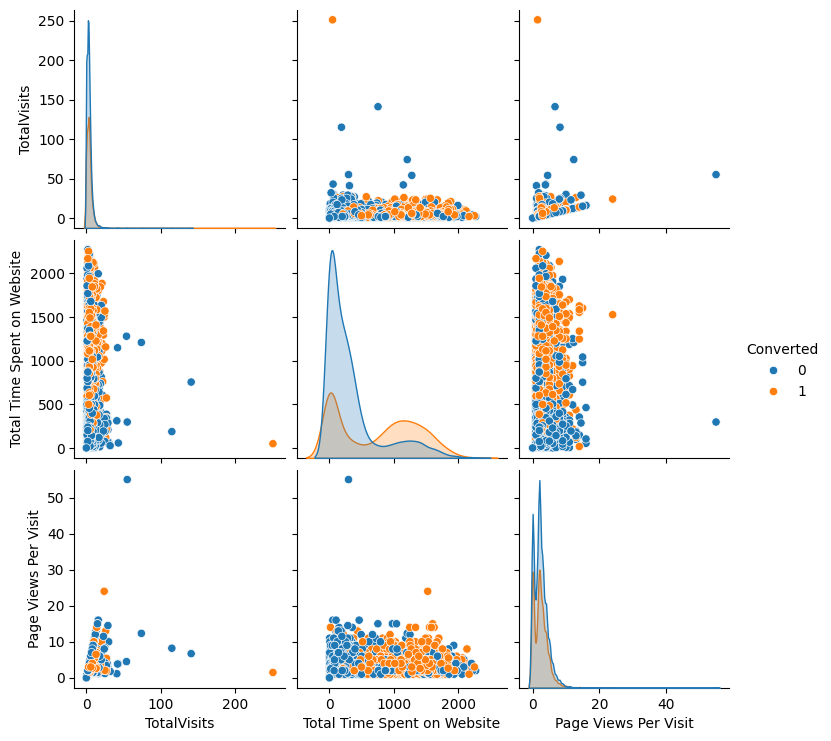

In [69]:
sns.pairplot(leadscore01,diag_kind='kde',hue='Converted')
plt.show()

#### Observations:
- Converted leads tend to visit less often but spend more time per visit
- Converted leads tend to visit less often but view more pages per visit

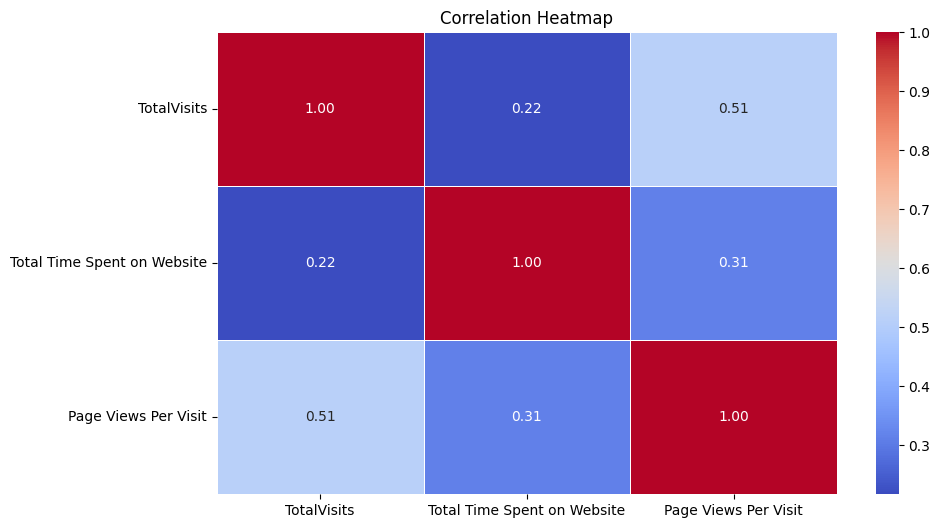

In [70]:
# Calculate the correlation matrix
corr = leadscore[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#### Observations:
- There is not much correlation between numerical variables

### Univariate Analysis

In [71]:
#defining function for selecting random colors for plots
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb

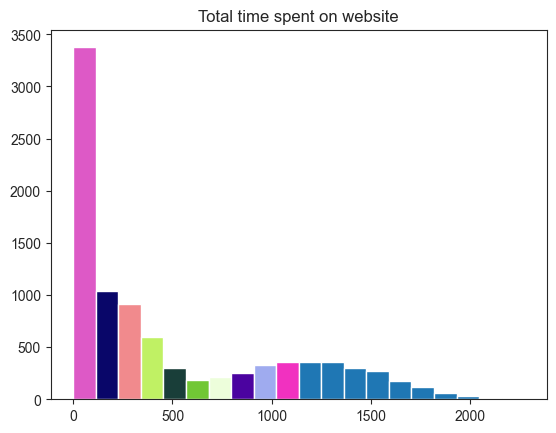

In [72]:
sns.set_style("ticks")
fig, ax = plt.subplots()
N,bins,patches = ax.hist(leadscore['Total Time Spent on Website'],bins=20)
for i in range(10):
    patches[i].set_facecolor(randomcolor())
plt.title("Total time spent on website")
plt.show()

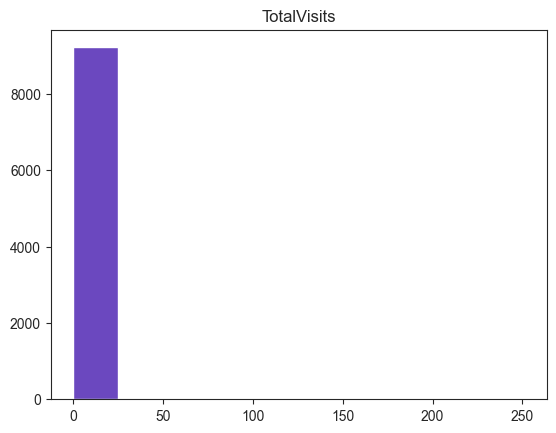

In [73]:
sns.set_style("ticks")
fig, ax = plt.subplots()
N,bins,patches = ax.hist(leadscore['TotalVisits'],bins=10)
for i in range(3):
    patches[i].set_facecolor(randomcolor())
plt.title("TotalVisits")
plt.show()

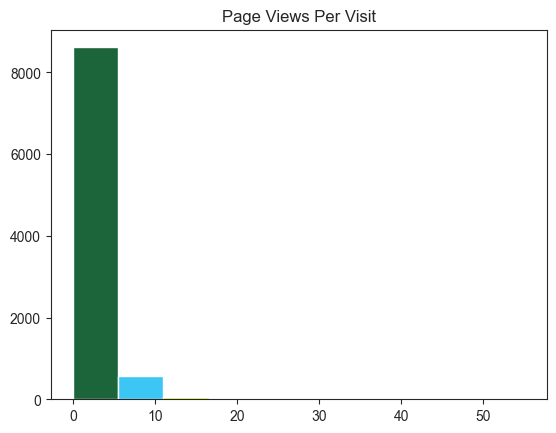

In [74]:
sns.set_style("ticks")
fig, ax = plt.subplots()
N,bins,patches = ax.hist(leadscore['Page Views Per Visit'],bins=10)
for i in range(3):
    patches[i].set_facecolor(randomcolor())
plt.title("Page Views Per Visit")
plt.show()

#### Numerical data seems to be highly skewed. It does not seem to be distributed normally which may lead to biased model predictions.

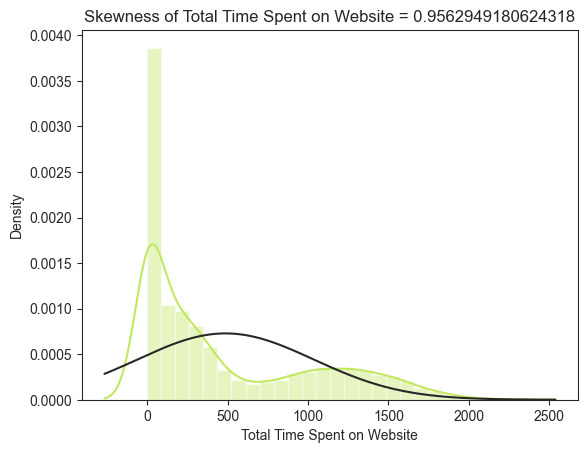

In [75]:
skewness = str(skew(leadscore['Total Time Spent on Website']))
sns.distplot(leadscore['Total Time Spent on Website'], fit = norm, color = randomcolor())
plt.title("Skewness of " + 'Total Time Spent on Website'+ ' = '+ skewness)
plt.show()

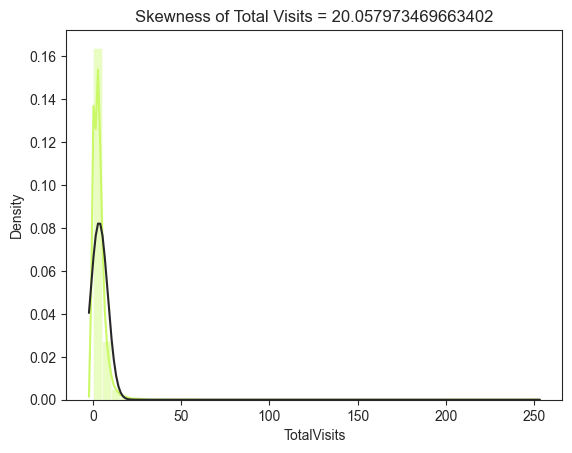

In [76]:
skewness = str(skew(leadscore['TotalVisits']))
sns.distplot(leadscore['TotalVisits'],fit = norm,color = randomcolor())
plt.title("Skewness of " + 'Total Visits'+ ' = '+ skewness)
plt.show()

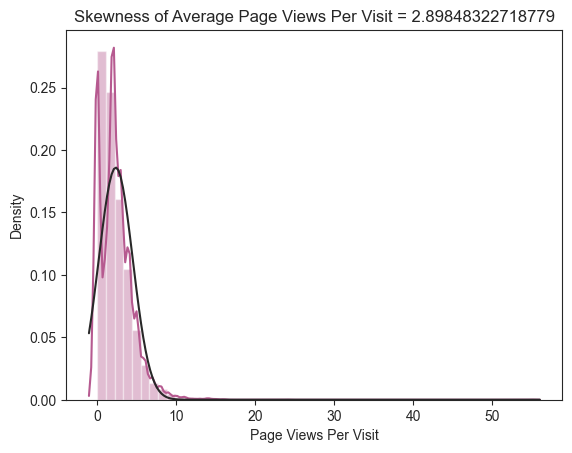

In [77]:
skewness = str(skew(leadscore['Page Views Per Visit']))
sns.distplot(leadscore['Page Views Per Visit'],fit = norm,color = randomcolor())
plt.title("Skewness of " + 'Average Page Views Per Visit'+ ' = '+ skewness)
plt.show()

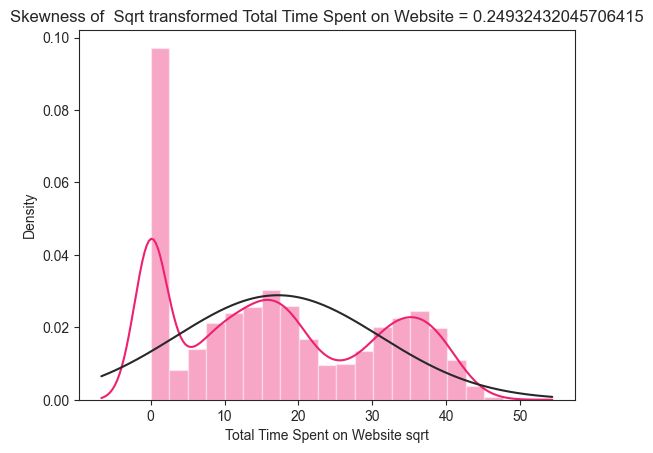

In [78]:
# Correcting skewness using square root transformation.

leadscore['Total Time Spent on Website sqrt'] = np.sqrt(leadscore['Total Time Spent on Website'])
skewness = str(skew(leadscore['Total Time Spent on Website sqrt']))
sns.distplot(leadscore['Total Time Spent on Website sqrt'],fit = norm,color = randomcolor())
plt.title("Skewness of " + ' Sqrt transformed Total Time Spent on Website'+ ' = '+ skewness)
plt.show()

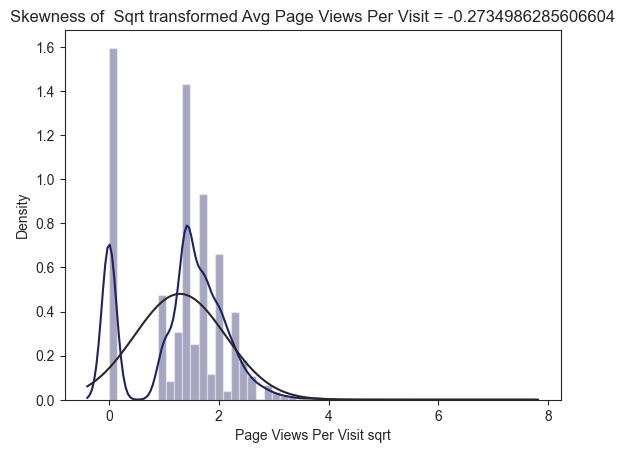

In [79]:
leadscore['Page Views Per Visit sqrt'] = np.sqrt(leadscore['Page Views Per Visit'])
skewness = str(skew(leadscore['Page Views Per Visit sqrt']))
sns.distplot(leadscore['Page Views Per Visit sqrt'],fit = norm,color = randomcolor())
plt.title("Skewness of " + ' Sqrt transformed Avg Page Views Per Visit'+ ' = '+ skewness)
plt.show()

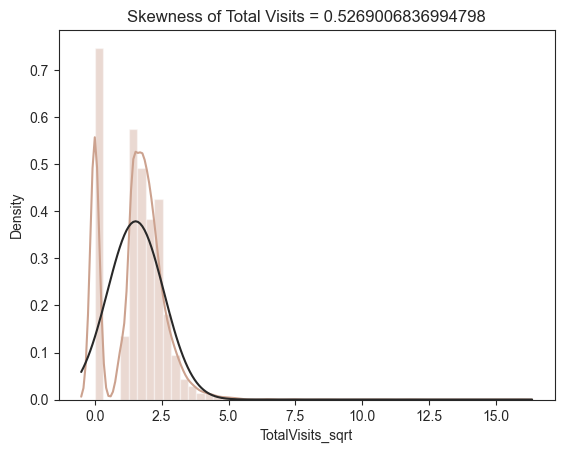

In [80]:
leadscore['TotalVisits_sqrt'] = np.sqrt(leadscore['TotalVisits'])
skewness = str(skew(leadscore['TotalVisits_sqrt']))
sns.distplot(leadscore['TotalVisits_sqrt'],fit = norm,color = randomcolor())
plt.title("Skewness of " + 'Total Visits'+ ' = '+ skewness)
plt.show()

#### We can clearly see that skewness in numerical columns has decreased significantly

In [81]:
# Lets remove the original numerical variables, since we have their transformed versions.
del leadscore['Page Views Per Visit']
del leadscore['Total Time Spent on Website']
del leadscore['TotalVisits']

In [82]:
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Total Time Spent on Website sqrt,Page Views Per Visit sqrt,TotalVisits_sqrt
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,Page Visited on Website,Unknown,Interested in other courses,Unknown,No,Modified,0.000000,0.000000,0.000000
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,Email Opened,Unknown,Ringing,Unknown,No,Email Opened,25.961510,1.581139,2.236068
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,Email Opened,Business Administration,Will revert after reading the email,Mumbai,Yes,Email Opened,39.140772,1.414214,1.414214
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,Unreachable,Media and Advertising,Ringing,Mumbai,No,Modified,17.464249,1.000000,1.000000
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,Converted to Lead,Unknown,Will revert after reading the email,Mumbai,No,Modified,37.788887,1.000000,1.414214


#### Categorical Variable Analysis

In [83]:
#selecting categorical columns from the dataset.
leadscore.select_dtypes(include=['object'])

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,Unknown,Interested in other courses,Unknown,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,Unknown,Ringing,Unknown,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,Unknown,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Email Marked Spam,IT Projects Management,Will revert after reading the email,Other International City,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,wrong number given,Mumbai,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,invalid number,Mumbai,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,SMS Sent,Human Resource Management,Unknown,Other Metro Cities,No,SMS Sent


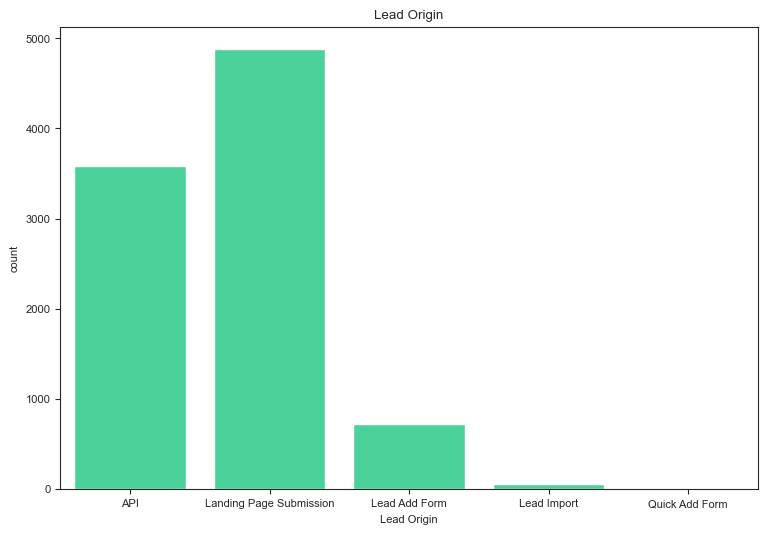

In [84]:
#bar chart counting number of leads by origin.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['Lead Origin'],color = randomcolor()).set_title('Lead Origin')
plt.show()

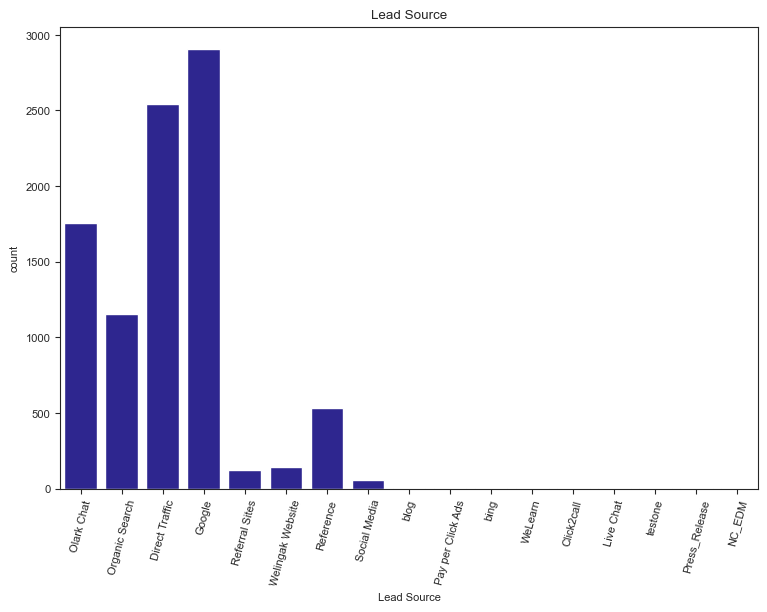

In [85]:
#bar chart counting number of leads by Lead Source.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['Lead Source'],color = randomcolor()).set_title('Lead Source')
plt.xticks(rotation=75)
plt.show()

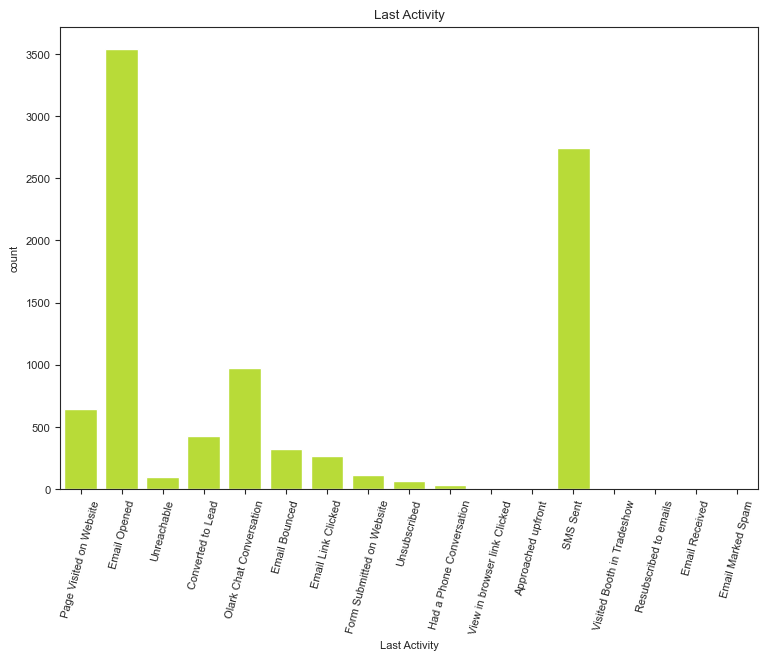

In [86]:
#bar chart counting number of leads by Last Activity.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['Last Activity'],color = randomcolor()).set_title('Last Activity')
plt.xticks(rotation=75)
plt.show()

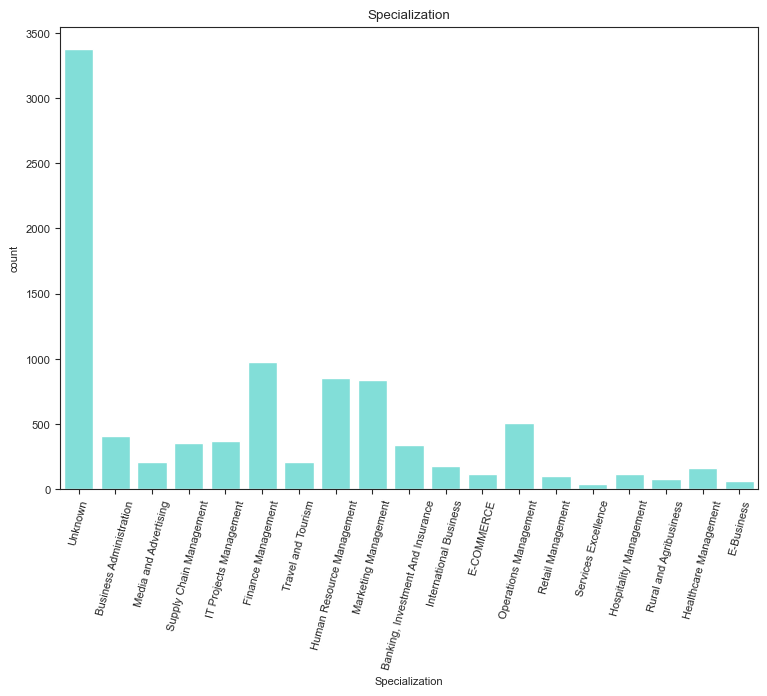

In [87]:
#bar chart counting number of leads by Specialization.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['Specialization'],color = randomcolor()).set_title('Specialization')
plt.xticks(rotation=75)
plt.show()

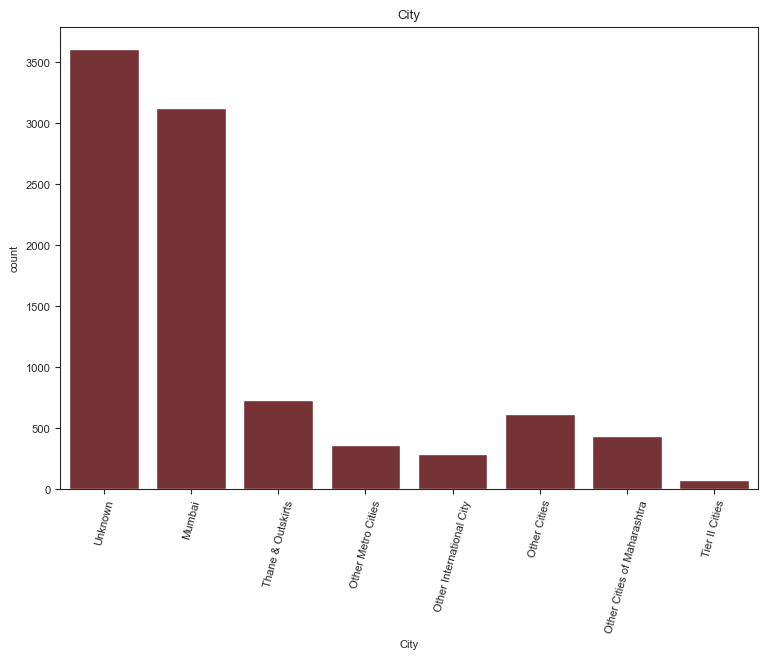

In [88]:
#bar chart counting number of leads by City.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['City'],color = randomcolor()).set_title('City')
plt.xticks(rotation=75)
plt.show()

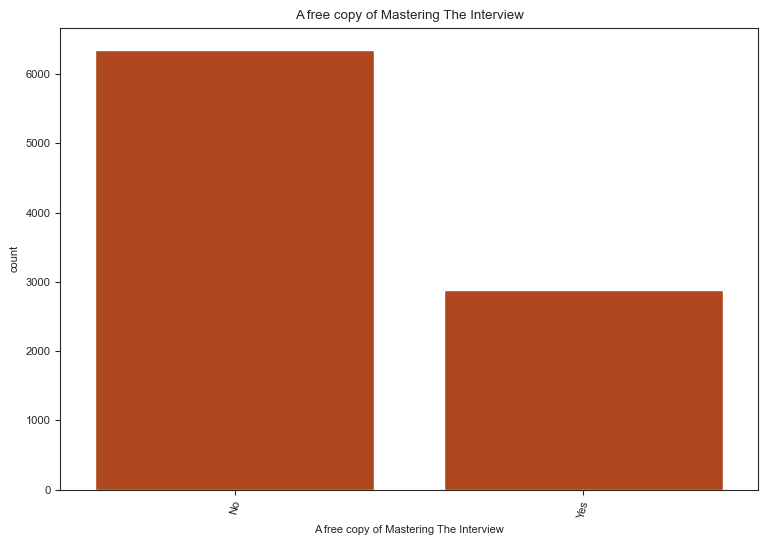

In [89]:
#bar chart counting number of leads by A free copy of Mastering The Interview.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['A free copy of Mastering The Interview'],color = randomcolor()).set_title('A free copy of Mastering The Interview')
plt.xticks(rotation=75)
plt.show()

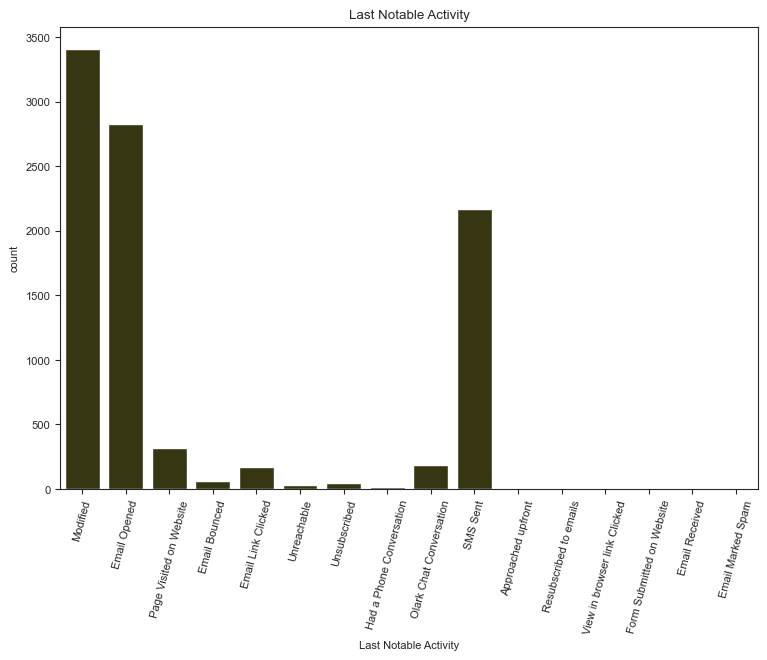

In [90]:
#bar chart counting number of leads by A free copy of Mastering The Interview.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['Last Notable Activity'],color = randomcolor()).set_title('Last Notable Activity')
plt.xticks(rotation=75)
plt.show()

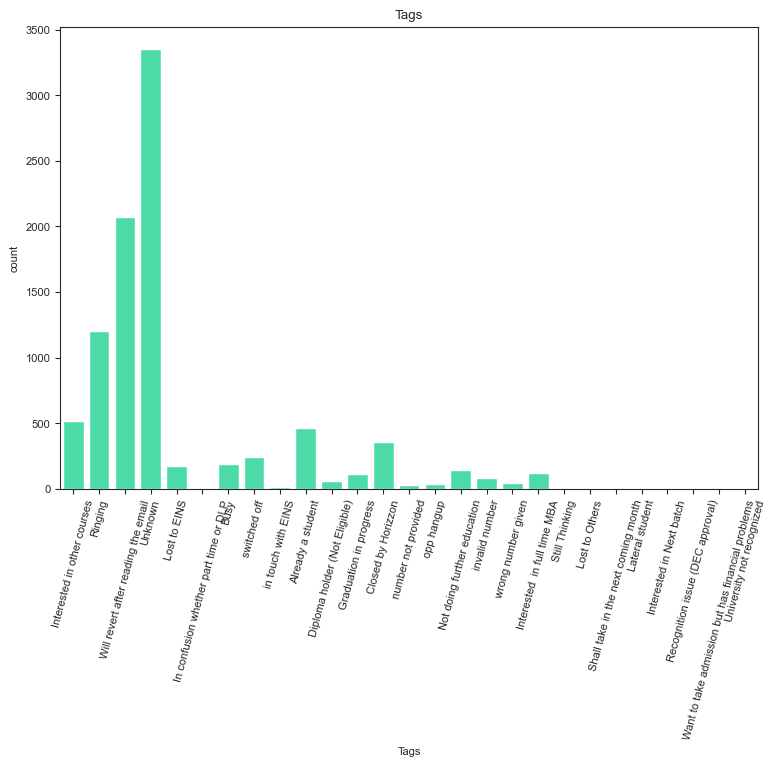

In [91]:
#bar chart counting number of leads by A free copy of Mastering The Interview.
plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 8})
sns.countplot(x=leadscore['Tags'],color = randomcolor()).set_title('Tags')
plt.xticks(rotation=75)
plt.show()

### Category wise conversion rate

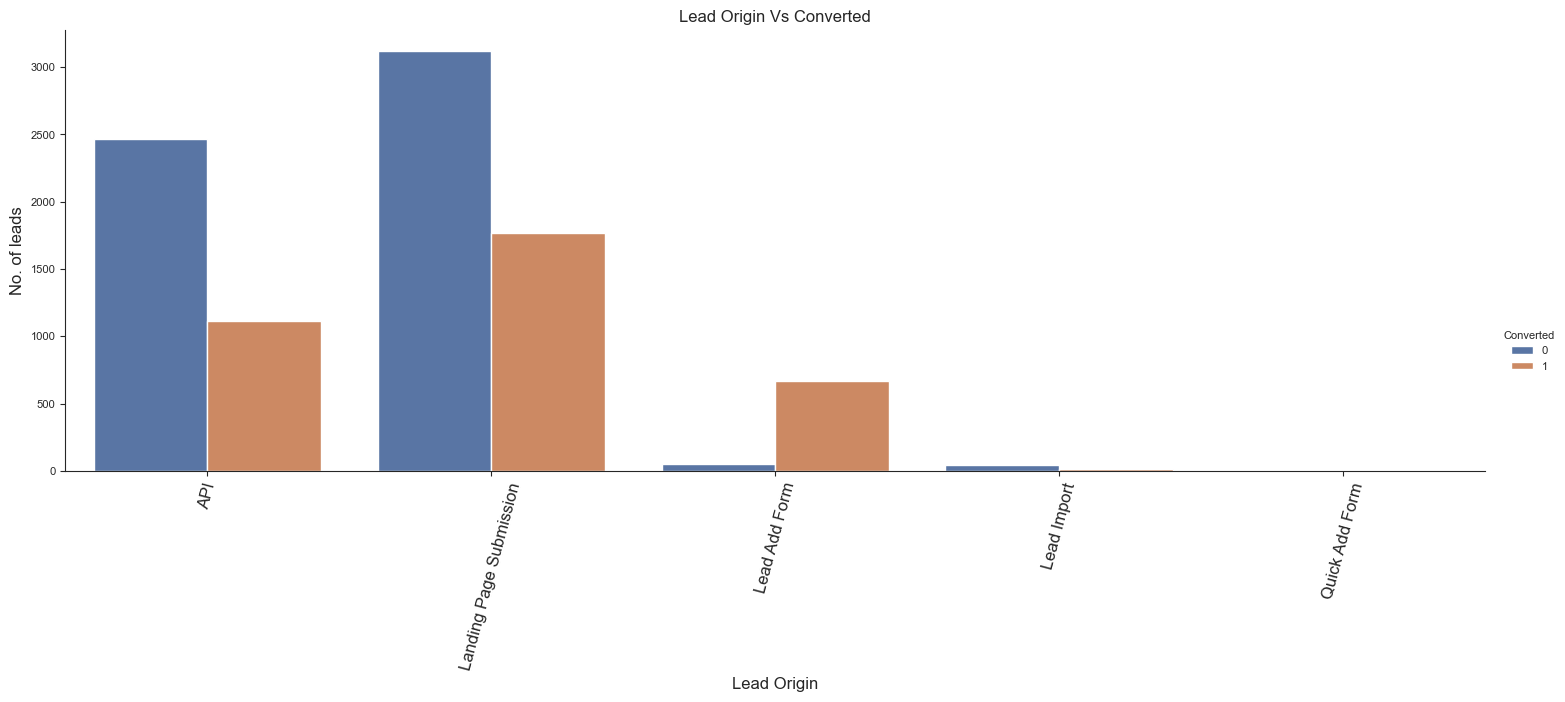

In [92]:
plot = sns.catplot(x="Lead Origin", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('Lead Origin Vs Converted', fontsize=12)
plt.xlabel("Lead Origin", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()


#### Landing Page Submission contributes most to both the categories.

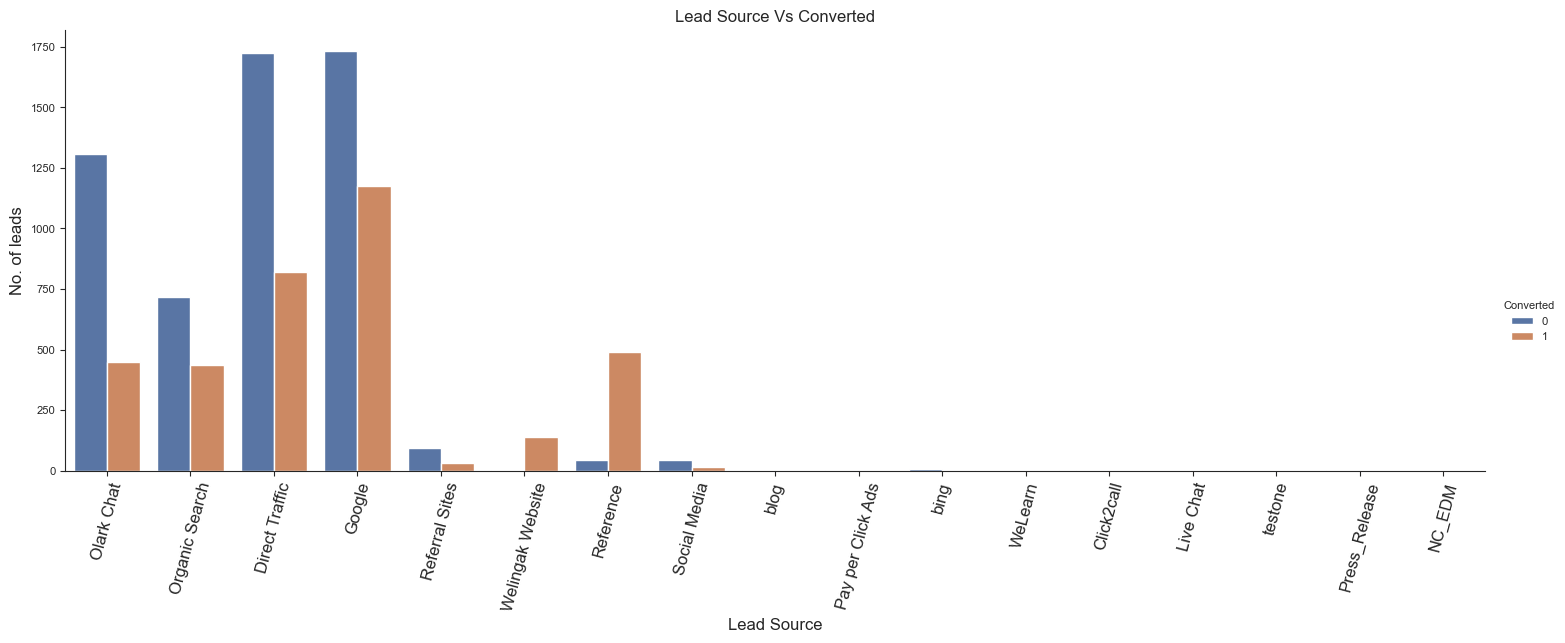

In [93]:
plot = sns.catplot(x="Lead Source", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('Lead Source Vs Converted', fontsize=12)
plt.xlabel("Lead Source", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()

#### Most converted leads come from Google

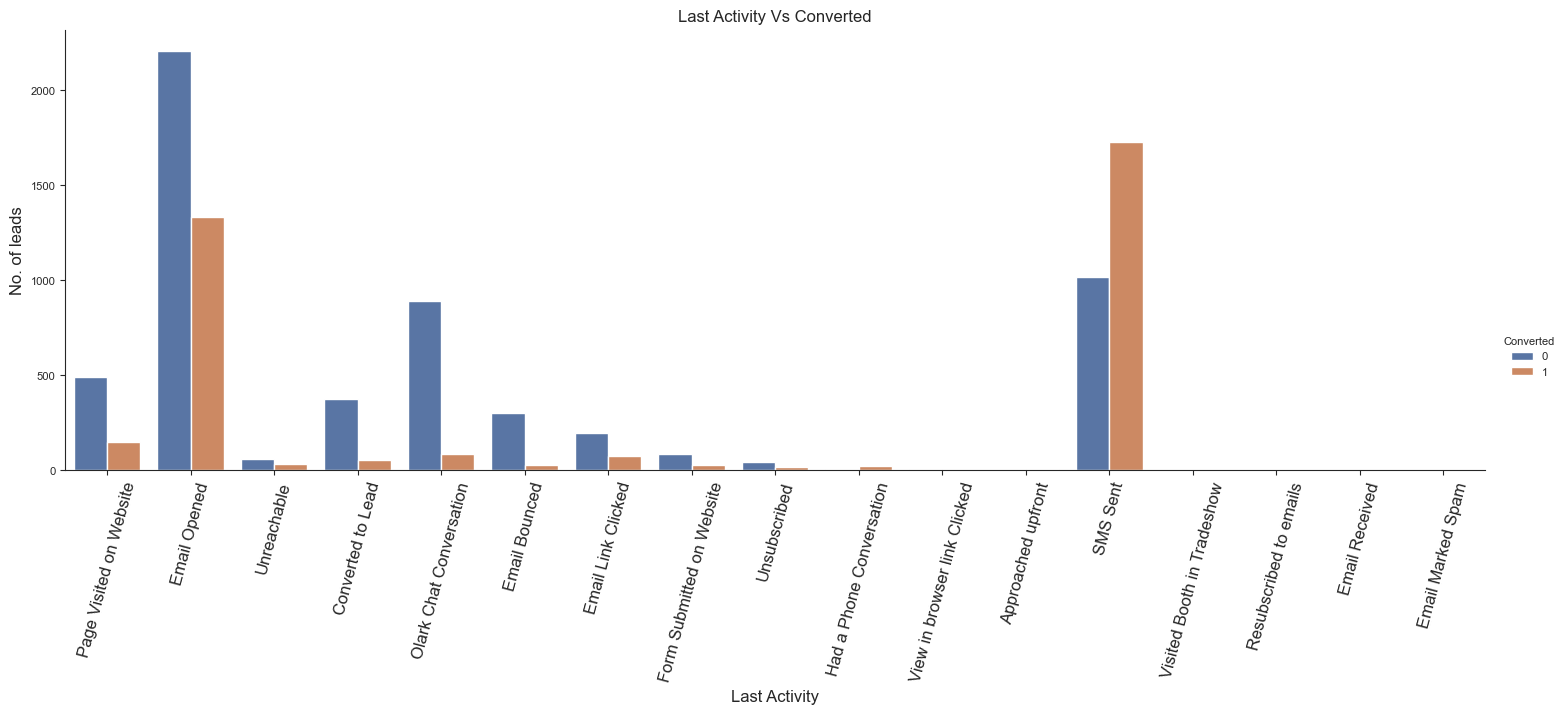

In [94]:
plot = sns.catplot(x="Last Activity", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('Last Activity Vs Converted', fontsize=12)
plt.xlabel("Last Activity", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()

#### Most converted leads in Last Activity was 'SMS Sent'

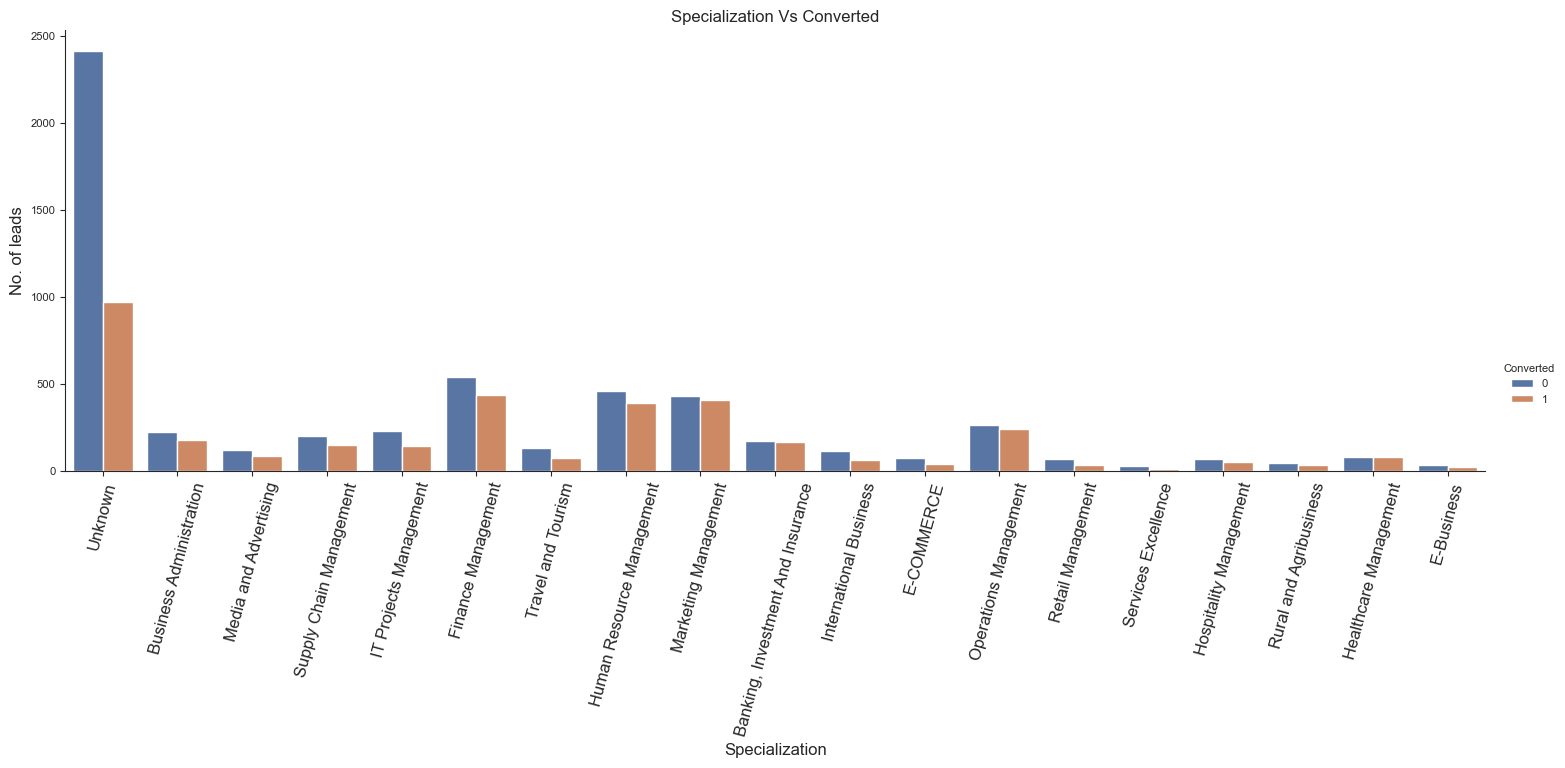

In [95]:
plot = sns.catplot(x="Specialization", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('Specialization Vs Converted', fontsize=12)
plt.xlabel("Specialization", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()

#### Most converted leads in Specialisation are from Finance Management

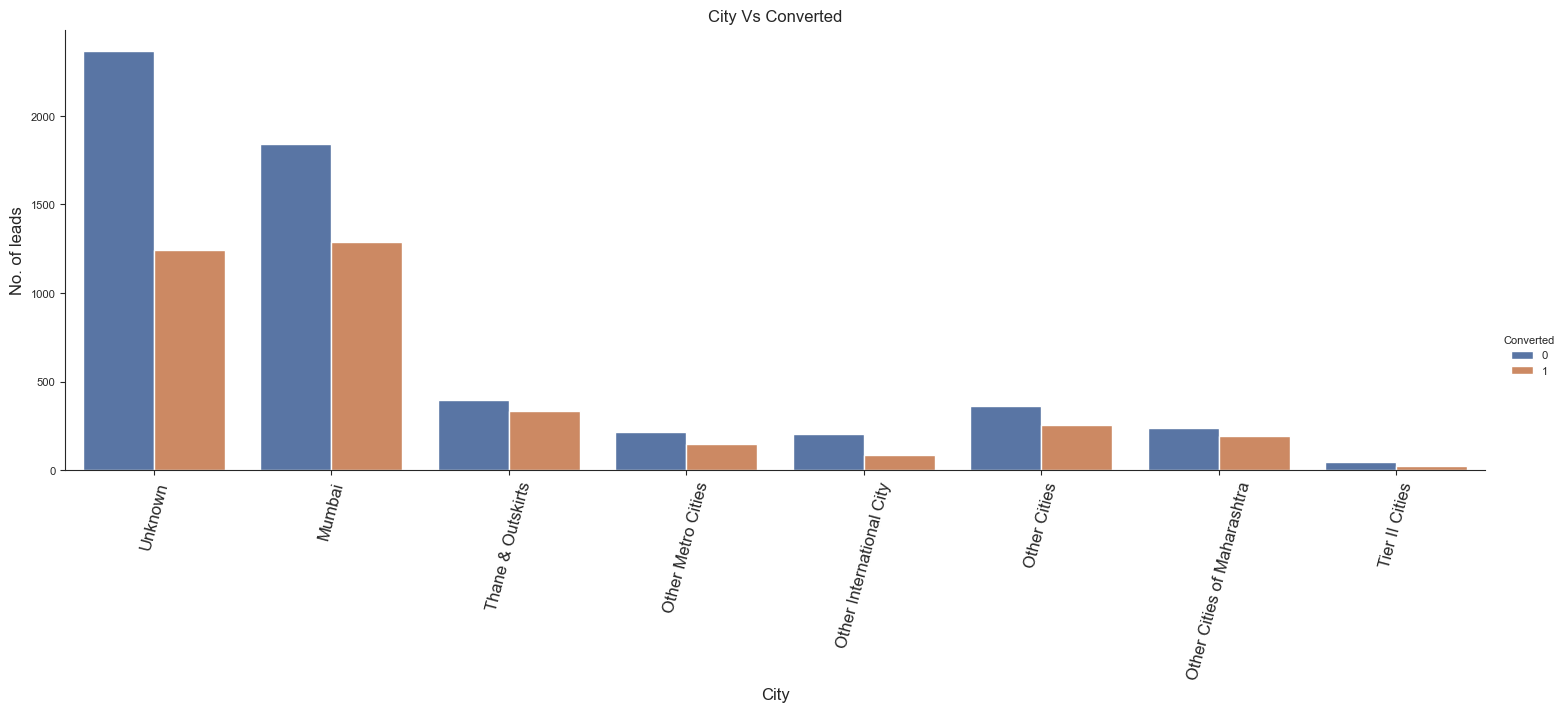

In [96]:
plot = sns.catplot(x="City", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('City Vs Converted', fontsize=12)
plt.xlabel("City", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()

#### Most converted leads in city are from Mumbai

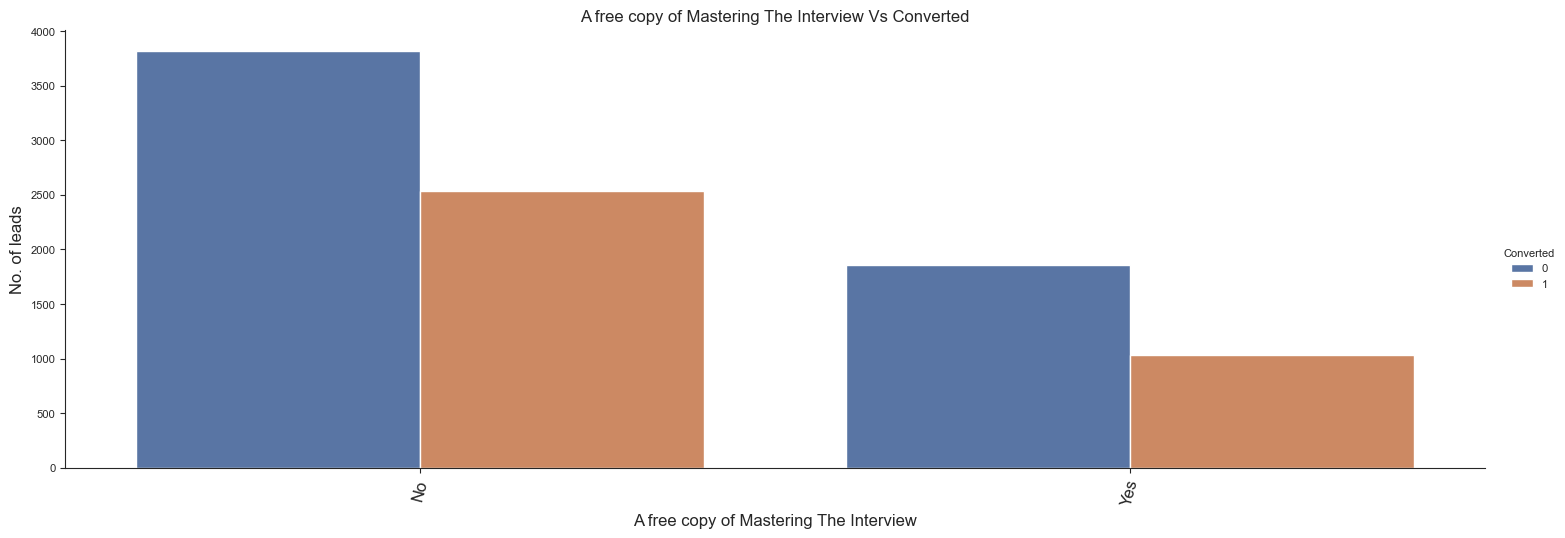

In [97]:
plot = sns.catplot(x="A free copy of Mastering The Interview", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('A free copy of Mastering The Interview Vs Converted', fontsize=12)
plt.xlabel("A free copy of Mastering The Interview", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()

#### People not taking the free copy of mastering the interview are more likely to convert than those who've taken the free book.

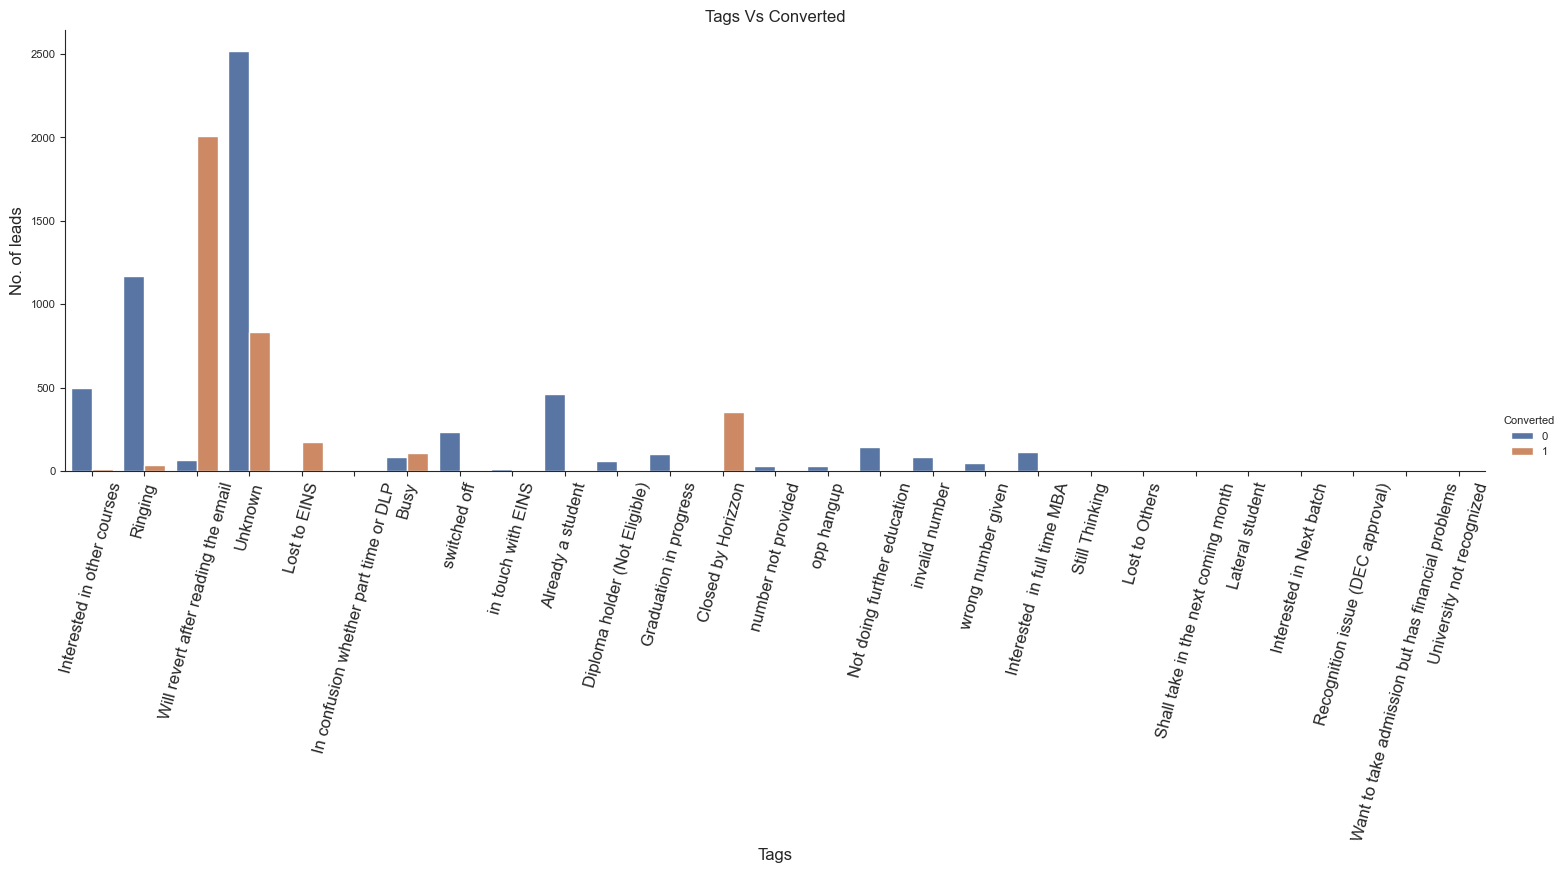

In [98]:
plot = sns.catplot(x="Tags", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('Tags Vs Converted', fontsize=12)
plt.xlabel("Tags", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()

#### People with tag 'will revert after reading the email' more likely to convert.

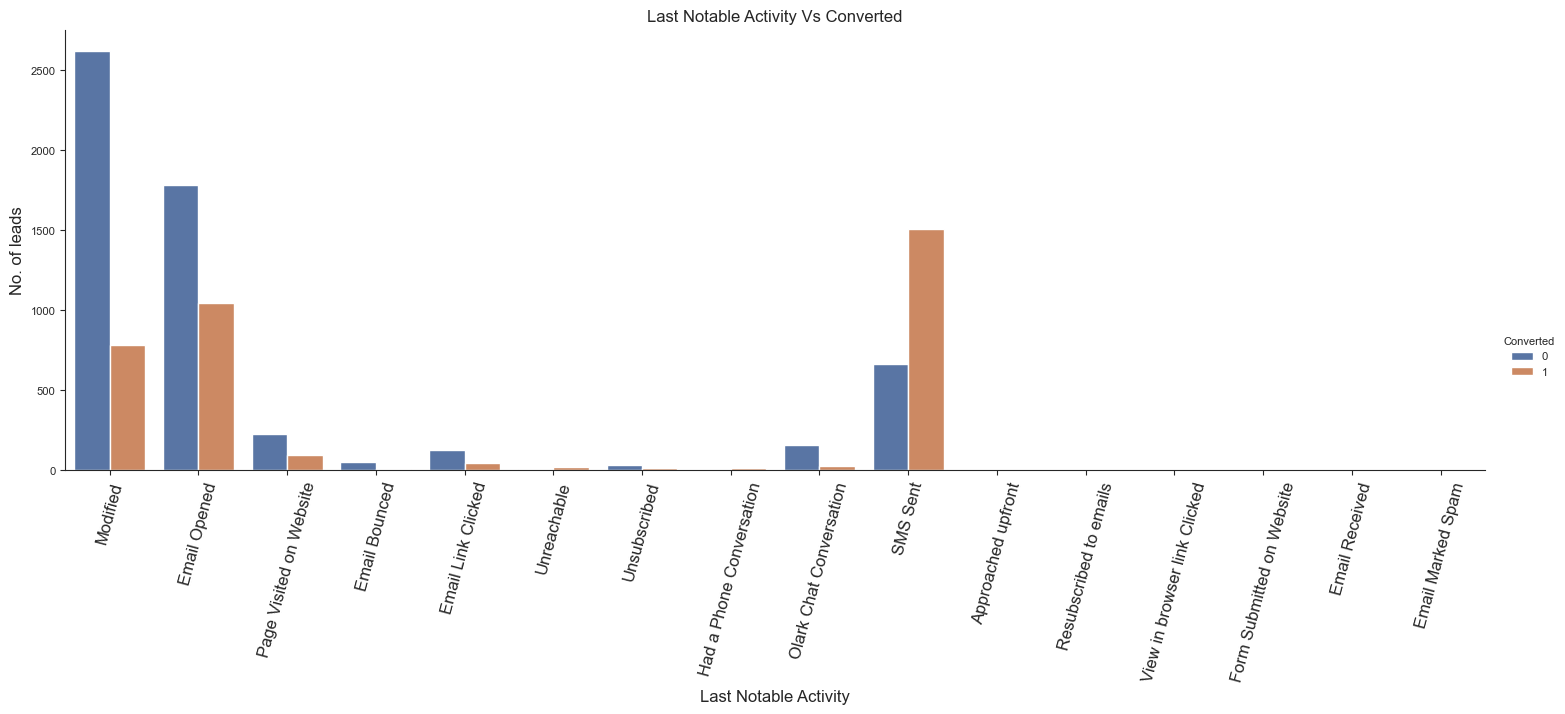

In [99]:
plot = sns.catplot(x="Last Notable Activity", hue="Converted", kind="count", data=leadscore, palette="deep", aspect=3)
plt.title('Last Notable Activity Vs Converted', fontsize=12)
plt.xlabel("Last Notable Activity", fontsize=12)
plt.ylabel("No. of leads", fontsize=12)
plt.xticks(rotation=75, fontsize=12)
plt.show()

#### Most converted leads have last notable activity as 'SMS Sent'

### Outlier Analysis

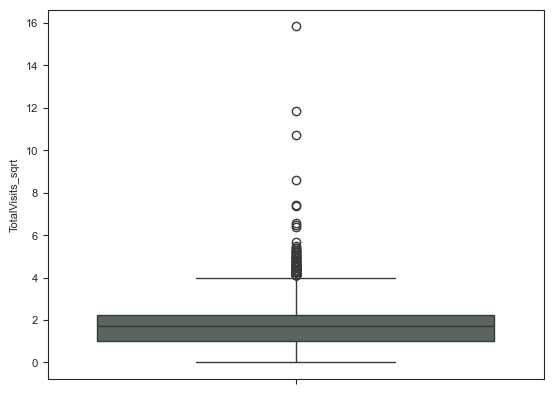

In [100]:
#checking the spread of the numerical variables.
sns.boxplot(leadscore['TotalVisits_sqrt'],color=randomcolor())
plt.show()

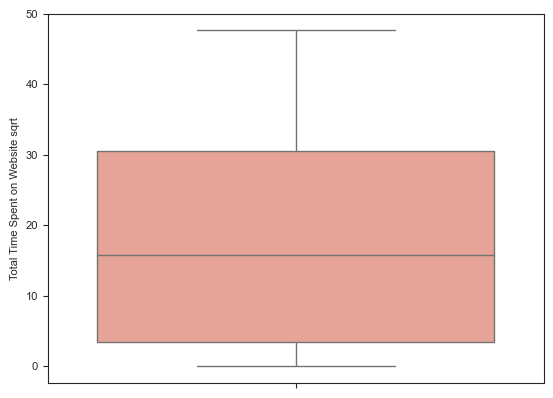

In [101]:
sns.boxplot(leadscore['Total Time Spent on Website sqrt'],color=randomcolor())
plt.show()

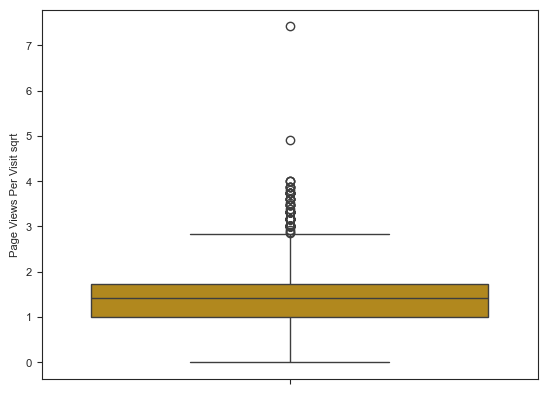

In [102]:
sns.boxplot(leadscore['Page Views Per Visit sqrt'],color=randomcolor())
plt.show()

In [103]:
leadscore.shape

(9240, 14)

#### In above steps we have reduced the skewness of the data and it now more closely resembles a normal distribution.
#### In a normal distribution, 99.7% of the data is contained within +-3 SD of the mean. We can use this to cut down on outliers.

In [104]:
out_num_leadscore=leadscore[['Page Views Per Visit sqrt','TotalVisits_sqrt']]
other_leadscore = pd.concat([leadscore.select_dtypes(include=['object']),leadscore['Total Time Spent on Website sqrt']],axis =1)
other_leadscore = pd.concat([other_leadscore,leadscore["Lead Number"],leadscore['Converted']],axis = 1)

q = out_num_leadscore.quantile(0.997)
out_num_leadscore = out_num_leadscore[out_num_leadscore < q]
out_num_leadscore.isnull().sum()

Page Views Per Visit sqrt    31
TotalVisits_sqrt             32
dtype: int64

In [105]:
# Filling missing values by median

out_num_leadscore['Page Views Per Visit sqrt'].fillna(out_num_leadscore['Page Views Per Visit sqrt'].median(), inplace=True)
out_num_leadscore['TotalVisits_sqrt'].fillna(out_num_leadscore['TotalVisits_sqrt'].median(), inplace=True)

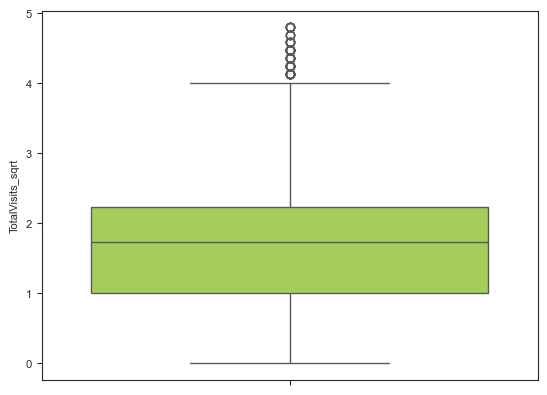

In [106]:
sns.boxplot(out_num_leadscore['TotalVisits_sqrt'],color=randomcolor())
plt.show()

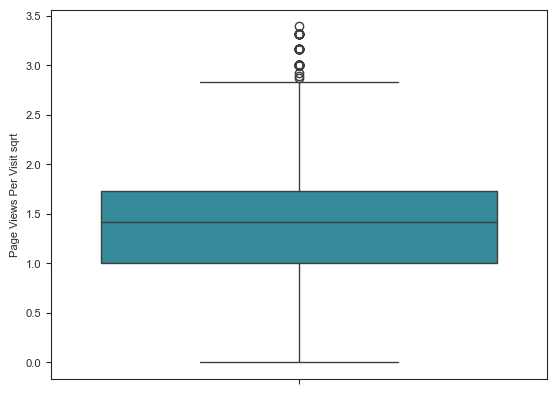

In [107]:
sns.boxplot(out_num_leadscore['Page Views Per Visit sqrt'],color=randomcolor())
plt.show()

#### First iteration of the process didn't remove as many outlying points as expected. lets go for second iteration.

In [108]:
q = out_num_leadscore.quantile(0.997)
out_num_leadscore = out_num_leadscore[out_num_leadscore < q]
out_num_leadscore.isnull().sum()

Page Views Per Visit sqrt    44
TotalVisits_sqrt             36
dtype: int64

In [109]:
# Filling missing values by median

out_num_leadscore['Page Views Per Visit sqrt'].fillna(out_num_leadscore['Page Views Per Visit sqrt'].median(), inplace=True)
out_num_leadscore['TotalVisits_sqrt'].fillna(out_num_leadscore['TotalVisits_sqrt'].median(), inplace=True)

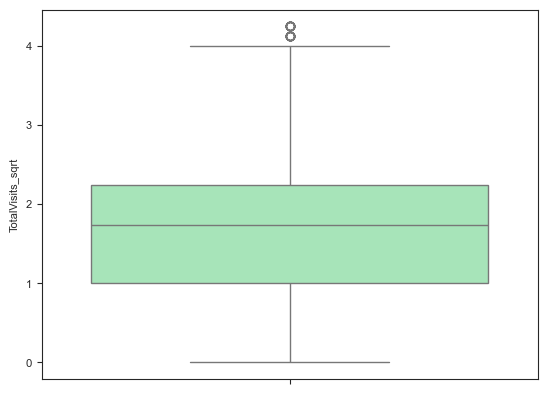

In [110]:
sns.boxplot(out_num_leadscore['TotalVisits_sqrt'],color=randomcolor())
plt.show()

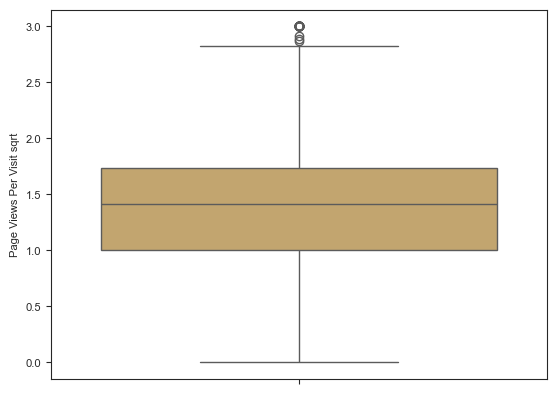

In [111]:
sns.boxplot(out_num_leadscore['Page Views Per Visit sqrt'],color=randomcolor())
plt.show()

#### Lets stop here as not many outliers are left we might risk loosing non outlying values

In [112]:
cleaned_leadscore=pd.concat([other_leadscore,out_num_leadscore],axis = 1)
cleaned_leadscore.head()

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Total Time Spent on Website sqrt,Lead Number,Converted,Page Views Per Visit sqrt,TotalVisits_sqrt
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,Unknown,Interested in other courses,Unknown,No,Modified,0.000000,660737,0,0.000000,0.000000
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,Unknown,Ringing,Unknown,No,Email Opened,25.961510,660728,0,1.581139,2.236068
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Will revert after reading the email,Mumbai,Yes,Email Opened,39.140772,660727,1,1.414214,1.414214
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Ringing,Mumbai,No,Modified,17.464249,660719,0,1.000000,1.000000
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,Unknown,Will revert after reading the email,Mumbai,No,Modified,37.788887,660681,1,1.000000,1.414214


In [113]:
cleaned_leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Last Activity                           9240 non-null   object 
 4   Specialization                          9240 non-null   object 
 5   Tags                                    9240 non-null   object 
 6   City                                    9240 non-null   object 
 7   A free copy of Mastering The Interview  9240 non-null   object 
 8   Last Notable Activity                   9240 non-null   object 
 9   Total Time Spent on Website sqrt        9240 non-null   float64
 10  Lead Number                             9240 non-null   int6

## Data Preparation

#### Converting some binary variables (Yes/No) to 1/0

In [114]:
# List of variables to map
varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
cleaned_leadscore[varlist] = cleaned_leadscore[varlist].apply(binary_map)

In [115]:
cleaned_leadscore.head()

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Total Time Spent on Website sqrt,Lead Number,Converted,Page Views Per Visit sqrt,TotalVisits_sqrt
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,Unknown,Interested in other courses,Unknown,0,Modified,0.000000,660737,0,0.000000,0.000000
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,Unknown,Ringing,Unknown,0,Email Opened,25.961510,660728,0,1.581139,2.236068
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Will revert after reading the email,Mumbai,1,Email Opened,39.140772,660727,1,1.414214,1.414214
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Ringing,Mumbai,0,Modified,17.464249,660719,0,1.000000,1.000000
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,Unknown,Will revert after reading the email,Mumbai,0,Modified,37.788887,660681,1,1.000000,1.414214


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [116]:
#importing required modules
from sklearn.preprocessing import OneHotEncoder

In [117]:
#removing ID variable from variables whose dummies are being created.
dummies_needed=cleaned_leadscore.drop("Prospect ID",axis=1).select_dtypes(include=['object'])
dummies_needed.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Tags',
       'City', 'Last Notable Activity'],
      dtype='object')

In [118]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(cleaned_leadscore[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Tags', 'City',
       'Last Notable Activity']], dtype=int, drop_first=True)

# Adding the results to the master dataframe
cleaned_leadscore = pd.concat([cleaned_leadscore, dummy1], axis=1)

In [119]:
cleaned_leadscore.head()

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Total Time Spent on Website sqrt,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,Unknown,Interested in other courses,Unknown,0,Modified,0.000000,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,Unknown,Ringing,Unknown,0,Email Opened,25.961510,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Will revert after reading the email,Mumbai,1,Email Opened,39.140772,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Ringing,Mumbai,0,Modified,17.464249,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,Unknown,Will revert after reading the email,Mumbai,0,Modified,37.788887,...,0,0,1,0,0,0,0,0,0,0


In [120]:
cleaned_leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 116 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: float64(3), int32(102), int64(3), object(8)
memory usage: 4.6+ MB


In [121]:
# We have created dummies for the below variables, so we can drop them
cleaned_leadscore = cleaned_leadscore.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Tags','City',
       'Last Notable Activity'], axis=1)

In [122]:
cleaned_leadscore.head()

,Prospect ID,A free copy of Mastering The Interview,Total Time Spent on Website sqrt,Lead Number,Converted,Page Views Per Visit sqrt,TotalVisits_sqrt,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.000000,660737,0,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,25.961510,660728,0,1.581139,2.236068,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,39.140772,660727,1,1.414214,1.414214,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,17.464249,660719,0,1.000000,1.000000,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,37.788887,660681,1,1.000000,1.414214,1,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Steps for modal building. Test-Train Split
- Create X and Y
- Create train and test sets (70-30)
- Train your modal on the training set (i.e. learn the coefficients)
- Evaluate the model (training set, test set)

In [123]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [124]:
# Create X and y
#Putting feature variable to X
X = cleaned_leadscore.drop(['Prospect ID','Converted'],axis=1)
X.head()

,A free copy of Mastering The Interview,Total Time Spent on Website sqrt,Lead Number,Page Views Per Visit sqrt,TotalVisits_sqrt,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.000000,660737,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,25.961510,660728,1.581139,2.236068,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,39.140772,660727,1.414214,1.414214,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,17.464249,660719,1.000000,1.000000,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,37.788887,660681,1.000000,1.414214,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [125]:
# Putting response variable to y
y = cleaned_leadscore['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [126]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=40)

In [127]:
X_train.head()

,A free copy of Mastering The Interview,Total Time Spent on Website sqrt,Lead Number,Page Views Per Visit sqrt,TotalVisits_sqrt,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8432,0,41.291646,585443,1.414214,1.414214,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7547,0,35.986108,591718,1.813836,1.732051,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2218,1,17.058722,638283,1.732051,1.732051,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7654,1,9.797959,591094,1.414214,1.414214,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7127,1,16.031220,594796,2.000000,2.828427,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling Feature 

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website sqrt','Page Views Per Visit sqrt','TotalVisits_sqrt']] = scaler.fit_transform(X_train[['Total Time Spent on Website sqrt','Page Views Per Visit sqrt','TotalVisits_sqrt']])

X_train.head()

,A free copy of Mastering The Interview,Total Time Spent on Website sqrt,Lead Number,Page Views Per Visit sqrt,TotalVisits_sqrt,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8432,0,1.740812,585443,0.176048,-0.087404,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7547,0,1.356293,591718,0.673967,0.233705,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2218,1,-0.015470,638283,0.572065,0.233705,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7654,1,-0.541694,591094,0.176048,-0.087404,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7127,1,-0.089938,594796,0.905923,1.341365,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
### Checking the Converted Rate
Lead_Converted_Rate = (sum(cleaned_leadscore['Converted'])/len(cleaned_leadscore['Converted'].index))*100
Lead_Converted_Rate

38.53896103896104

#### We have 38% lead conversion rate

In [131]:
import statsmodels.api as sm

In [132]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6368
Model Family:                Binomial   Df Model:                           99
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1154.4
Date:                Tue, 16 Apr 2024   Deviance:                       2308.8
Time:                        10:09:33   Pearson chi2:                 1.28e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6230
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     10.4390   2.16e+05   4.83e-05      1.000   -4.23e+05    4.23e+05
A free copy of Mastering The Interview                    -0.1873      0.189     -0.991      0.322      -0.558       0.183
Total Time Spent on Website sqrt                           1.3221      0.080     16.599      0.000       1.166       1.478
Lead Number                                             6.435e-06   2.57e-06      2.499      0.012    1.39e-06    1.15e-05
Page Views Per Visit sqrt                                 -0.8328      0.144     -5.769      0.000      -1.116      -0.550
TotalVisits_sqrt                                           0.3484      0.121      2.873      0.004       0.111       0.586
Lead Origin_Landing Page Submission                       -0.5826      0.259     -2.246      0.025      -1.091      -0.074
Lead Origin_Lead Add Form                                  2.4703      1.079      2.289      0.022       0.355       4.585
Lead Origin_Lead Import                                    1.0709      1.814      0.590      0.555      -2.485       4.627
Lead Origin_Quick Add Form                              2.619e-07      0.002      0.000      1.000      -0.005       0.005
Lead Source_Direct Traffic                                 2.5255      2.786      0.906      0.365      -2.936       7.987
Lead Source_Google                                         2.7225      2.778      0.980      0.327      -2.723       8.168
Lead Source_Live Chat                                   1.184e-07      0.001      0.000      1.000      -0.002       0.002
Lead Source_NC_EDM                                      4.298e-10      0.000   3.72e-06      1.000      -0.000       0.000
Lead Source_Olark Chat                                     3.5733      2.783      1.284      0.199      -1.882       9.028
Lead Source_Organic Search                                 2.8088      2.787      1.008      0.314      -2.654       8.271
Lead Source_Pay per Click Ads                            -17.0711   2.14e+05  -7.98e-05      1.000   -4.19e+05    4.19e+05
Lead Source_Press_Release                                -20.0563   1.28e+05     -0.000      1.000   -2.51e+05     2.5e+05
Lead Source_Reference                                      0.7168      2.594      0.276      0.782      -4.367       5.801
Lead Source_Referral Sites                                 2.5984      2.823      0.920      0.357      -2.935       8.132
Lead Source_Social Media                                   0.8232      3.188      0.258      0.796      -5.424       7.071
Lead Source_WeLearn                                    -2.689e-07      0.003     -0.000      1.000      -0.005       0.005
Lead Sou

## Feature Selection 
#### Using RFE

In [133]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [134]:
from sklearn.feature_selection import RFE

# Assuming logreg is your logistic regression model
rfe = RFE(estimator=logreg, n_features_to_select=20)  # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)


In [135]:
rfe.support_

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False])

In [136]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('A free copy of Mastering The Interview', False, 53),
 ('Total Time Spent on Website sqrt', True, 1),
 ('Lead Number', False, 81),
 ('Page Views Per Visit sqrt', False, 18),
 ('TotalVisits_sqrt', False, 35),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Origin_Quick Add Form', False, 82),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Google', False, 55),
 ('Lead Source_Live Chat', False, 83),
 ('Lead Source_NC_EDM', False, 87),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 57),
 ('Lead Source_Pay per Click Ads', False, 78),
 ('Lead Source_Press_Release', False, 50),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 56),
 ('Lead Source_Social Media', False, 17),
 ('Lead Source_WeLearn', False, 84),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 62),
 ('Lead Source_blog', False, 51),
 ('Lead Sour

In [137]:
col = X_train.columns[rfe.support_]

In [138]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Lead Number',
       'Page Views Per Visit sqrt', 'TotalVisits_sqrt',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on W

## Model Building 
#### Assessing the model with StatsModels

In [139]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1239.4
Date:                Tue, 16 Apr 2024   Deviance:                       2478.9
Time:                        10:09:48   Pearson chi2:                 1.14e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6129
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.6130      0.212    -17.044      0.000      -4.028      -3.197
Total Time Spent on Website sqrt                  1.2272      0.072     17.035      0.000       1.086       1.368
Lead Origin_Lead Add Form                         1.9890      0.399      4.986      0.000       1.207       2.771
Lead Source_Olark Chat                            1.8782      0.174     10.816      0.000       1.538       2.218
Lead Source_Welingak Website                      5.1033      1.091      4.679      0.000       2.966       7.241
Last Activity_Email Bounced                      -1.3501      0.534     -2.527      0.012      -2.397      -0.303
Last Activity_SMS Sent                            1.1853      0.225      5.267      0.000       0.744       1.626
Tags_Busy                                         2.2260      0.297      7.501      0.000       1.644       2.808
Tags_Closed by Horizzon                           9.1153      1.041      8.760      0.000       7.076      11.155
Tags_Lost to EINS                                 8.7618      1.037      8.453      0.000       6.730      10.793
Tags_Not doing further education                -21.5701   1.98e+04     -0.001      0.999   -3.89e+04    3.89e+04
Tags_Ringing                                     -1.7573      0.308     -5.702      0.000      -2.361      -1.153
Tags_Unknown                                      1.7329      0.207      8.368      0.000       1.327       2.139
Tags_Will revert after reading the email          6.4498      0.269     23.995      0.000       5.923       6.977
Tags_in touch with EINS                           3.0021      0.864      3.475      0.001       1.309       4.695
Tags_invalid number                             -23.0577   2.42e+04     -0.001      0.999   -4.75e+04    4.75e+04
Tags_switched off                                -2.0198      0.576     -3.504      0.000      -3.150      -0.890
Tags_wrong number given                         -23.2804   3.03e+04     -0.001      0.999   -5.93e+04    5.93e+04
Last Notable Activity_Modified                   -1.3602      0.152     -8.920      0.000      -1.659      -1.061
Last Notable Activity_Olark Chat Conversation    -1.4217      0.409     -3.479      0.001      -2.223      -0.621
Last Notable Activity_SMS Sent                    1.0542      0.261      4.033      0.000       0.542       1.567
=================================================================================================================
"""

In [140]:
col1 = col.drop('Tags_invalid number', 1)
col1

Index(['Total Time Spent on Website sqrt', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [141]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1244.4
Date:                Tue, 16 Apr 2024   Deviance:                       2488.9
Time:                        10:09:55   Pearson chi2:                 1.13e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6124
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.7804      0.211    -17.901      0.000      -4.194      -3.366
Total Time Spent on Website sqrt                  1.2371      0.072     17.179      0.000       1.096       1.378
Lead Origin_Lead Add Form                         2.0141      0.400      5.035      0.000       1.230       2.798
Lead Source_Olark Chat                            1.8959      0.173     10.930      0.000       1.556       2.236
Lead Source_Welingak Website                      5.0917      1.091      4.667      0.000       2.953       7.230
Last Activity_Email Bounced                      -1.3646      0.534     -2.554      0.011      -2.412      -0.317
Last Activity_SMS Sent                            1.1779      0.226      5.223      0.000       0.736       1.620
Tags_Busy                                         2.4067      0.294      8.185      0.000       1.830       2.983
Tags_Closed by Horizzon                           9.2726      1.041      8.910      0.000       7.233      11.312
Tags_Lost to EINS                                 8.9250      1.037      8.609      0.000       6.893      10.957
Tags_Not doing further education                -21.4016   1.99e+04     -0.001      0.999   -3.89e+04    3.89e+04
Tags_Ringing                                     -1.5648      0.304     -5.145      0.000      -2.161      -0.969
Tags_Unknown                                      1.9036      0.205      9.268      0.000       1.501       2.306
Tags_Will revert after reading the email          6.6156      0.268     24.649      0.000       6.090       7.142
Tags_in touch with EINS                           3.1662      0.864      3.666      0.000       1.474       4.859
Tags_switched off                                -1.8245      0.574     -3.177      0.001      -2.950      -0.699
Tags_wrong number given                         -23.0911   3.03e+04     -0.001      0.999   -5.94e+04    5.94e+04
Last Notable Activity_Modified                   -1.3560      0.153     -8.874      0.000      -1.655      -1.056
Last Notable Activity_Olark Chat Conversation    -1.4257      0.409     -3.483      0.000      -2.228      -0.623
Last Notable Activity_SMS Sent                    1.0203      0.261      3.908      0.000       0.509       1.532
=================================================================================================================
"""

In [142]:
col2 = col1.drop('Tags_wrong number given', 1)
col2

Index(['Total Time Spent on Website sqrt', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [143]:
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1247.7
Date:                Tue, 16 Apr 2024   Deviance:                       2495.4
Time:                        10:09:57   Pearson chi2:                 1.13e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6120
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.8777      0.212    -18.306      0.000      -4.293      -3.463
Total Time Spent on Website sqrt                  1.2359      0.072     17.171      0.000       1.095       1.377
Lead Origin_Lead Add Form                         2.0199      0.401      5.041      0.000       1.235       2.805
Lead Source_Olark Chat                            1.8999      0.173     10.951      0.000       1.560       2.240
Lead Source_Welingak Website                      5.0837      1.091      4.659      0.000       2.945       7.222
Last Activity_Email Bounced                      -1.3694      0.534     -2.565      0.010      -2.416      -0.323
Last Activity_SMS Sent                            1.1726      0.226      5.198      0.000       0.730       1.615
Tags_Busy                                         2.5138      0.293      8.572      0.000       1.939       3.089
Tags_Closed by Horizzon                           9.3643      1.041      8.996      0.000       7.324      11.405
Tags_Lost to EINS                                 9.0188      1.037      8.697      0.000       6.986      11.051
Tags_Not doing further education                -20.3018    1.2e+04     -0.002      0.999   -2.36e+04    2.36e+04
Tags_Ringing                                     -1.4505      0.303     -4.792      0.000      -2.044      -0.857
Tags_Unknown                                      2.0043      0.205      9.755      0.000       1.602       2.407
Tags_Will revert after reading the email          6.7120      0.269     24.956      0.000       6.185       7.239
Tags_in touch with EINS                           3.2607      0.864      3.776      0.000       1.568       4.953
Tags_switched off                                -1.7091      0.573     -2.980      0.003      -2.833      -0.585
Last Notable Activity_Modified                   -1.3527      0.153     -8.845      0.000      -1.652      -1.053
Last Notable Activity_Olark Chat Conversation    -1.4261      0.409     -3.484      0.000      -2.228      -0.624
Last Notable Activity_SMS Sent                    1.0046      0.261      3.853      0.000       0.494       1.516
=================================================================================================================
"""

In [144]:
col3 = col2.drop('Tags_Not doing further education', 1)
col3

Index(['Total Time Spent on Website sqrt', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Unknown', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [145]:
X_train_sm = sm.add_constant(X_train[col3])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1249.3
Date:                Tue, 16 Apr 2024   Deviance:                       2498.5
Time:                        10:09:59   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6118
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.9364      0.211    -18.670      0.000      -4.350      -3.523
Total Time Spent on Website sqrt                  1.2378      0.072     17.187      0.000       1.097       1.379
Lead Origin_Lead Add Form                         2.0211      0.400      5.048      0.000       1.236       2.806
Lead Source_Olark Chat                            1.9056      0.174     10.975      0.000       1.565       2.246
Lead Source_Welingak Website                      5.0889      1.091      4.664      0.000       2.950       7.227
Last Activity_Email Bounced                      -1.3945      0.530     -2.630      0.009      -2.434      -0.355
Last Activity_SMS Sent                            1.1734      0.225      5.204      0.000       0.731       1.615
Tags_Busy                                         2.5707      0.293      8.785      0.000       1.997       3.144
Tags_Closed by Horizzon                           9.4251      1.041      9.057      0.000       7.385      11.465
Tags_Lost to EINS                                 9.0807      1.037      8.759      0.000       7.049      11.113
Tags_Ringing                                     -1.3952      0.302     -4.618      0.000      -1.987      -0.803
Tags_Unknown                                      2.0614      0.205     10.079      0.000       1.661       2.462
Tags_Will revert after reading the email          6.7719      0.268     25.263      0.000       6.247       7.297
Tags_in touch with EINS                           3.3188      0.864      3.843      0.000       1.626       5.011
Tags_switched off                                -1.6540      0.573     -2.885      0.004      -2.778      -0.530
Last Notable Activity_Modified                   -1.3551      0.153     -8.865      0.000      -1.655      -1.056
Last Notable Activity_Olark Chat Conversation    -1.4255      0.410     -3.480      0.001      -2.228      -0.623
Last Notable Activity_SMS Sent                    1.0061      0.261      3.859      0.000       0.495       1.517
=================================================================================================================
"""

In [146]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8432    0.998146
7547    0.451108
2218    0.004914
7654    0.021404
7127    0.995401
415     0.121931
6957    0.022416
5085    0.013113
4678    0.082148
8151    0.010762
dtype: float64

In [147]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99814561, 0.45110846, 0.00491449, 0.02140351, 0.99540124,
       0.12193139, 0.02241597, 0.01311329, 0.08214792, 0.01076237])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [148]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,1,0.998146,8432
1,1,0.451108,7547
2,0,0.004914,2218
3,0,0.021404,7654
4,1,0.995401,7127


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [149]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.998146,8432,1
1,1,0.451108,7547,0
2,0,0.004914,2218,0
3,0,0.021404,7654,0
4,1,0.995401,7127,1


## Model Evaluation

In [150]:
from sklearn import metrics

In [151]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3825  156]
 [ 307 2180]]


In [152]:
#Predicted       not_converted     converted
#Actual
#not_converted    3825               156
#converted         307              2180  

In [153]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9284168212739641


#### Checking VIFs

In [154]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [155]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Notable Activity_SMS Sent,5.95
5,Last Activity_SMS Sent,5.80
2,Lead Source_Olark Chat,2.05
1,Lead Origin_Lead Add Form,1.99
17,Last Notable Activity_Modified,1.92
0,Total Time Spent on Website sqrt,1.83
12,Tags_Will revert after reading the email,1.76
11,Tags_Unknown,1.72
3,Lead Source_Welingak Website,1.34
7,Tags_Closed by Horizzon,1.28


#### There are a few variables with high VIF. The variable 'Last Notable Activity_SMS Sent' has the highest VIF. So let's drop it.

In [156]:
col4 = col3.drop('Last Notable Activity_SMS Sent', 1)
col4

Index(['Total Time Spent on Website sqrt', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Unknown', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [157]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col4])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1256.8
Date:                Tue, 16 Apr 2024   Deviance:                       2513.6
Time:                        10:10:17   Pearson chi2:                 1.18e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6109
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.8398      0.208    -18.492      0.000      -4.247      -3.433
Total Time Spent on Website sqrt                  1.2311      0.072     17.184      0.000       1.091       1.372
Lead Origin_Lead Add Form                         2.0079      0.411      4.882      0.000       1.202       2.814
Lead Source_Olark Chat                            1.9464      0.173     11.275      0.000       1.608       2.285
Lead Source_Welingak Website                      5.0639      1.096      4.622      0.000       2.917       7.211
Last Activity_Email Bounced                      -1.2316      0.528     -2.332      0.020      -2.267      -0.197
Last Activity_SMS Sent                            1.9198      0.116     16.589      0.000       1.693       2.147
Tags_Busy                                         2.5736      0.290      8.884      0.000       2.006       3.141
Tags_Closed by Horizzon                           9.6121      1.043      9.219      0.000       7.569      11.656
Tags_Lost to EINS                                 9.2360      1.039      8.892      0.000       7.200      11.272
Tags_Ringing                                     -1.2896      0.298     -4.321      0.000      -1.875      -0.705
Tags_Unknown                                      2.0318      0.203     10.001      0.000       1.634       2.430
Tags_Will revert after reading the email          6.8197      0.270     25.295      0.000       6.291       7.348
Tags_in touch with EINS                           3.2875      0.873      3.765      0.000       1.576       4.999
Tags_switched off                                -1.5334      0.570     -2.688      0.007      -2.652      -0.415
Last Notable Activity_Modified                   -1.7268      0.126    -13.661      0.000      -1.975      -1.479
Last Notable Activity_Olark Chat Conversation    -1.5303      0.409     -3.739      0.000      -2.332      -0.728
=================================================================================================================
"""

In [158]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [159]:
y_train_pred[:10]

array([0.99795136, 0.46547406, 0.00373717, 0.02030282, 0.99653475,
       0.1333615 , 0.01942188, 0.0124667 , 0.08757306, 0.01038084])

In [160]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [161]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.997951,8432,1
1,1,0.465474,7547,0
2,0,0.003737,2218,0
3,0,0.020303,7654,0
4,1,0.996535,7127,1


In [162]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9276437847866419


#### Overall accuracy has not dropped much

#### Lets check VIF again !!

In [163]:
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,2.02
1,Lead Origin_Lead Add Form,1.99
0,Total Time Spent on Website sqrt,1.82
11,Tags_Will revert after reading the email,1.70
10,Tags_Unknown,1.67
5,Last Activity_SMS Sent,1.62
14,Last Notable Activity_Modified,1.51
3,Lead Source_Welingak Website,1.34
7,Tags_Closed by Horizzon,1.28
9,Tags_Ringing,1.13


#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [164]:
import pandas as pd
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

# Get feature ranking
feature_ranking = rfe.ranking_

# Get feature names
feature_names = X_train.columns

# Convert feature names and their rankings to a DataFrame
df = pd.DataFrame({'Features': feature_names, 'Ranking': feature_ranking})

# Sort the DataFrame by ranking in ascending order (most important features first)
df_sorted = df.sort_values(by='Ranking', ascending=True)

# Print the sorted DataFrame
print(df_sorted)


                                                   Features  Ranking
80                                      Tags_invalid number        1
68                                        Tags_Lost to EINS        1
60                                  Tags_Closed by Horizzon        1
59                                                Tags_Busy        1
72                                             Tags_Ringing        1
76                                             Tags_Unknown        1
78                 Tags_Will revert after reading the email        1
79                                  Tags_in touch with EINS        1
36                                   Last Activity_SMS Sent        1
26                              Last Activity_Email Bounced        1
83                                        Tags_switched off        1
84                                  Tags_wrong number given        1
21                             Lead Source_Welingak Website        1
70                         Tags_No

#### Metrics beyond accuracy

In [165]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [166]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8765581021310817

In [167]:
# Let us calculate specificity
TN / float(TN+FP)

0.9608138658628486

In [168]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.03918613413715147


In [169]:
# positive predictive value 
print (TP / float(TP+FP))

0.9332191780821918


In [170]:
# Negative predictive value
print (TN / float(TN+ FN))

0.925701839303001


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
- ROC curve has area of 0.97. Curve seems to be accurate showing trade off between sensitivity and specificity.

In [171]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [172]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

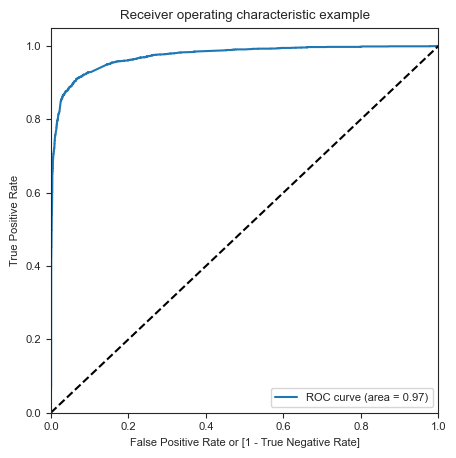

In [173]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

In [174]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.997951,8432,1,1,1,1,1,1,1,1,1,1,1
1,1,0.465474,7547,0,1,1,1,1,1,0,0,0,0,0
2,0,0.003737,2218,0,1,0,0,0,0,0,0,0,0,0
3,0,0.020303,7654,0,1,0,0,0,0,0,0,0,0,0
4,1,0.996535,7127,1,1,1,1,1,1,1,1,1,1,1


In [175]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384508  1.000000  0.000000
0.1   0.1  0.832870  0.973060  0.745290
0.2   0.2  0.910637  0.928830  0.899272
0.3   0.3  0.922542  0.913550  0.928159
0.4   0.4  0.925634  0.901890  0.940467
0.5   0.5  0.927644  0.878166  0.958553
0.6   0.6  0.927489  0.856051  0.972118
0.7   0.7  0.916512  0.814234  0.980407
0.8   0.8  0.909864  0.790109  0.984677
0.9   0.9  0.887600  0.721351  0.991459


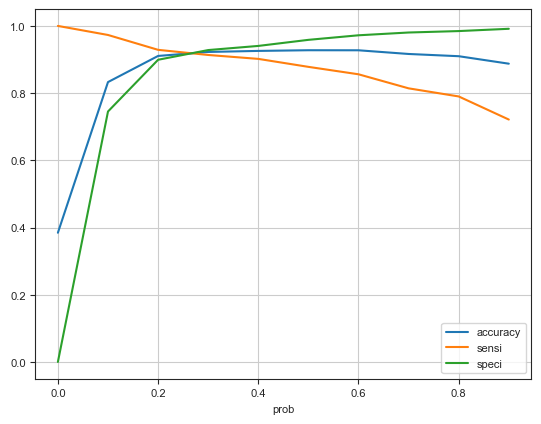

In [176]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid(True)
plt.show()

#### From the curve above intersection point is approximately at 0.285 cut off probability

In [177]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.285 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.997951,8432,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.465474,7547,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.003737,2218,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.020303,7654,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.996535,7127,1,1,1,1,1,1,1,1,1,1,1,1


In [178]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9213048855905999

In [179]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3683,  298],
       [ 211, 2276]], dtype=int64)

In [180]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [181]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9151588258946521

In [182]:
# Let us calculate specificity
TN / float(TN+FP)

0.9251444360713389

In [183]:
# Calculate false postive rate - predicting converted lead when customer has not converted to lead
print(FP/ float(TN+FP))

0.07485556392866113


In [184]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8842268842268842


In [185]:
# Negative predictive value
print (TN / float(TN+ FN))

0.945814072932717


In [186]:
y_train_pred_final['Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Score
0,1,0.997951,8432,1,1,1,1,1,1,1,1,1,1,1,1,100
1,1,0.465474,7547,0,1,1,1,1,1,0,0,0,0,0,1,47
2,0,0.003737,2218,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.020303,7654,0,1,0,0,0,0,0,0,0,0,0,0,2
4,1,0.996535,7127,1,1,1,1,1,1,1,1,1,1,1,1,100


In [187]:
import pandas as pd

# Assuming df is your DataFrame
y_train_pred_final.to_csv('y_train_pred_final.csv', index=False)


In [188]:
#taking only the columns with alphabetical column names
final_lead_scoring = y_train_pred_final[["Lead Number","Converted","final_predicted","Score"]]
final_lead_scoring.head()

,Lead Number,Converted,final_predicted,Score
0,8432,1,1,100
1,7547,1,1,47
2,2218,0,0,0
3,7654,0,0,2
4,7127,1,1,100


In [189]:
#showing the predictions made for leads who converted.
final_lead_scoring[final_lead_scoring["Converted"]==1]['final_predicted']

0       1
1       1
4       1
13      1
15      1
16      1
17      1
20      0
30      1
32      1
33      1
34      0
35      1
37      1
39      0
40      1
43      1
45      1
46      1
50      0
52      1
53      1
54      1
63      1
66      1
67      1
68      1
69      1
70      1
75      1
82      1
83      1
84      1
87      1
93      1
94      1
95      1
96      1
98      1
103     1
108     1
109     1
111     1
112     1
116     1
118     1
119     1
120     1
122     1
125     1
126     1
128     1
134     1
136     1
139     1
140     1
143     1
144     1
148     1
153     1
155     1
157     1
158     0
159     1
163     1
171     1
173     1
174     1
177     0
180     1
187     1
188     1
190     1
193     1
194     1
198     1
199     1
200     1
201     1
206     1
214     0
215     1
216     1
217     1
220     1
223     1
226     1
228     1
230     1
231     1
235     1
237     1
238     1
239     0
240     1
242     1
246     1
247     0
251     1
254     1


In [190]:
#printing conversion rate
print("Conversion Rate: ", str(round(len(final_lead_scoring[final_lead_scoring["Converted"]==1][final_lead_scoring['final_predicted']==1])/len(final_lead_scoring[final_lead_scoring["Converted"]==1]['final_predicted']),1)*100)+"%")

Conversion Rate:  90.0%


### Precision and Recall

In [191]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3816,  165],
       [ 303, 2184]], dtype=int64)

##### Precision
TP / TP + FP

In [192]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.929757343550447

##### Recall
TP / TP + FN

In [193]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8781664656212304

In [194]:
from sklearn.metrics import precision_score, recall_score

In [195]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.929757343550447

In [196]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8781664656212304

### Precision and Recall tradeoff

In [197]:
from sklearn.metrics import precision_recall_curve

In [198]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       0
 4       1
 5       0
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      0
 13      1
 14      0
 15      1
 16      1
 17      1
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      0
 25      0
 26      0
 27      0
 28      0
 29      0
 30      1
 31      0
 32      1
 33      1
 34      1
 35      1
 36      0
 37      1
 38      0
 39      1
 40      1
 41      0
 42      0
 43      1
 44      0
 45      1
 46      1
 47      0
 48      0
 49      0
 50      1
 51      0
 52      1
 53      1
 54      1
 55      0
 56      0
 57      0
 58      0
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      0
 66      1
 67      1
 68      1
 69      1
 70      1
 71      0
 72      0
 73      0
 74      0
 75      1
 76      0
 77      0
 78      0
 79      0
 80      0
 81      0
 82      1
 83      1
 84      1
 85      0
 86      0
 87      1
 88      0
 89      0
 90      0

In [199]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

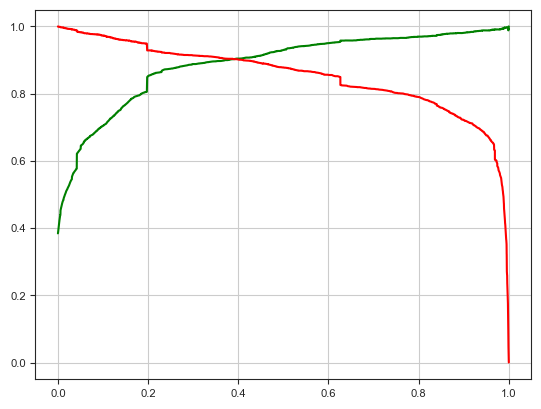

In [200]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid('True')
plt.show()

## Model Prediction

#### Making predictions on the test set

In [201]:
X_test[['Total Time Spent on Website sqrt','Page Views Per Visit sqrt','TotalVisits_sqrt']] = scaler.transform(X_test[['Total Time Spent on Website sqrt','Page Views Per Visit sqrt','TotalVisits_sqrt']])

X_test.head()

,A free copy of Mastering The Interview,Total Time Spent on Website sqrt,Lead Number,Page Views Per Visit sqrt,TotalVisits_sqrt,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other International City,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5736,0,0.965508,605805,0.660186,2.126487,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8903,1,-0.952979,582084,2.151898,1.514703,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8196,0,-0.157452,587310,-0.340052,-0.087404,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2073,0,-0.340804,

In [202]:
X_test = X_test[col4]

X_test.head()

,Total Time Spent on Website sqrt,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
5736,0.965508,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8903,-0.952979,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8196,-0.157452,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2073,-0.340804,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6566,0.074710,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [203]:
X_test_sm = sm.add_constant(X_test)

In [204]:
y_test_pred = res.predict(X_test_sm)

In [205]:
y_test_pred[:10]

5736    0.349914
8903    0.043388
8196    0.119005
2073    0.002507
6566    0.004174
4695    0.097610
3262    0.646852
8654    0.041907
2887    0.013622
2184    0.971060
dtype: float64

In [206]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [207]:
# Let's see the head
y_pred_1.head()

,0
5736,0.349914
8903,0.043388
8196,0.119005
2073,0.002507
6566,0.004174


In [208]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [209]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [210]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [211]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [212]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,5736,0.349914
1,0,8903,0.043388
2,0,8196,0.119005
3,0,2073,0.002507
4,0,6566,0.004174


In [213]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Conversion_Prob'})

In [214]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Lead_Conversion_Prob'], axis=1)


In [215]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Lead_Conversion_Prob
0,5736,0,0.349914
1,8903,0,0.043388
2,8196,0,0.119005
3,2073,0,0.002507
4,6566,0,0.004174


In [216]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Conversion_Prob.map(lambda x: 1 if x > 0.375 else 0)

In [217]:
y_pred_final.head()

,Lead Number,Converted,Lead_Conversion_Prob,final_predicted
0,5736,0,0.349914,0
1,8903,0,0.043388,0
2,8196,0,0.119005,0
3,2073,0,0.002507,0
4,6566,0,0.004174,0


In [218]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9235209235209235

In [219]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1582,  116],
       [  96,  978]], dtype=int64)

In [220]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [221]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9106145251396648

In [222]:
# Let us calculate specificity
TN / float(TN+FP)

0.9316843345111896

## Modal Summary
- Conversion rate is almost 90% which is a huge improvement from the initial 30% and we are achieving target lead conversion rate as was expected by CEO of X Education company

- Sensitivity value for both test data and train test data is above 90%. Model seems to well.
- 

In [223]:
pd.options.display.float_format = '{:.2f}'.format # Setting format option
res.params

const                                           -3.84
Total Time Spent on Website sqrt                 1.23
Lead Origin_Lead Add Form                        2.01
Lead Source_Olark Chat                           1.95
Lead Source_Welingak Website                     5.06
Last Activity_Email Bounced                     -1.23
Last Activity_SMS Sent                           1.92
Tags_Busy                                        2.57
Tags_Closed by Horizzon                          9.61
Tags_Lost to EINS                                9.24
Tags_Ringing                                    -1.29
Tags_Unknown                                     2.03
Tags_Will revert after reading the email         6.82
Tags_in touch with EINS                          3.29
Tags_switched off                               -1.53
Last Notable Activity_Modified                  -1.73
Last Notable Activity_Olark Chat Conversation   -1.53
dtype: float64

In [224]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient:-

top_feature = res.params
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature.sort_values(ascending = False)

Tags_Closed by Horizzon                         100.00
Tags_Lost to EINS                                96.09
Tags_Will revert after reading the email         70.95
Lead Source_Welingak Website                     52.68
Tags_in touch with EINS                          34.20
Tags_Busy                                        26.77
Tags_Unknown                                     21.14
Lead Origin_Lead Add Form                        20.89
Lead Source_Olark Chat                           20.25
Last Activity_SMS Sent                           19.97
Total Time Spent on Website sqrt                 12.81
Last Activity_Email Bounced                     -12.81
Tags_Ringing                                    -13.42
Last Notable Activity_Olark Chat Conversation   -15.92
Tags_switched off                               -15.95
Last Notable Activity_Modified                  -17.96
const                                           -39.95
dtype: float64

### Final Model Equation.

##### Converted = 100 Tags_Closed by Horizzon + 96.09 Tags_Lost to EINS + 70.95 Tags_Will revert after reading the email + 52.68 Lead Source_Welingak Website + 34.20 Tags_in touch with EINS + 26.77 Tags_Busy + 21.14 Tags_Unknown + 20.89 Lead Origin_Lead Add Form + 20.25 Lead Source_Olark Chat + 19.97 Last Activity_SMS Sent + 12.81 Total Time Spent on Website sqrt - 12.81 Last Activity_Email Bounced -13.42 Tags_Ringing -15.92 Last Notable Activity_Olark Chat Conversation - Tags_switched off - 17.96 Last Notable Activity_Modified 

### <font color = 'orange'> Recommendations:

##### <font color = 'yellow'> To improve the potential lead conversion rate X-Education will have to mainly focus important features responsible for good conversion rate are :-
##### <font color= 'cyan'> 1.Focus on High-Value Tags: Prioritize leads with tags such as "Closed by Horizon" and "Lost to EINS," as they have a strong positive impact on conversion.
##### <font color= 'cyan'> 2.Engage with Active Leads: Actively engage with leads who exhibit positive engagement signals, such as "Will revert after reading the email" and "Had a Phone Conversation."
##### <font color= 'cyan'> 3.Leverage Effective Channels: Utilize channels like SMS communication and the Welingak website to effectively engage leads and increase conversion rates.
##### <font color= 'cyan'> 4.Address Negative Signals: Identify and address negative signals such as "Busy" or "Unsubscribed" to mitigate their impact on conversion.
##### <font color= 'cyan'> 5.Optimize Lead Origin and Specialization: Further investigate the impact of lead origin and specialization on conversion and consider optimizing strategies accordingly.
##### <font color= 'cyan'> 6.Continuous Monitoring and Adaptation: Regularly monitor the performance of predictor variables and adapt strategies to maximize conversion rates over time.